# Term Deposite Analysis

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading Training data set
df_train=pd.read_csv('termdeposit_train.csv')
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
# loading test dataset
df_test=pd.read_csv("termdeposit_test.csv")
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


We can see that in the train dataset there are 31647 rows and 18 columns present out of which 17 columns are features and the last column subscribed is the label. Hare we need to prepare model based on traing dataset and then we need to predict the dataset through the test dataset. The test dataset contains 13564 rows and 17 features column.

In [4]:
# Checking Column names
df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [5]:
# Checkng index of training dataset
df_train.index

RangeIndex(start=0, stop=31647, step=1)

In [6]:
# checking basic information of the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


The traing dataset is pandas dataframe type which is indexed from 0 to 31646. in the non null count column the count of every features is same and equal to no of rows which refers that there is no missing value present in the dataset.

In [7]:
# Checking Basic info of test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


The test dataset is pandas dataframe type data where we have 13564 rows indexd from 0 to 13563. Count of non null is same as the total no of rows. hence there is no missing data present in the dataset.

In [8]:
# Checking missing data in traing dataset
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There is no missing value in the dataset.

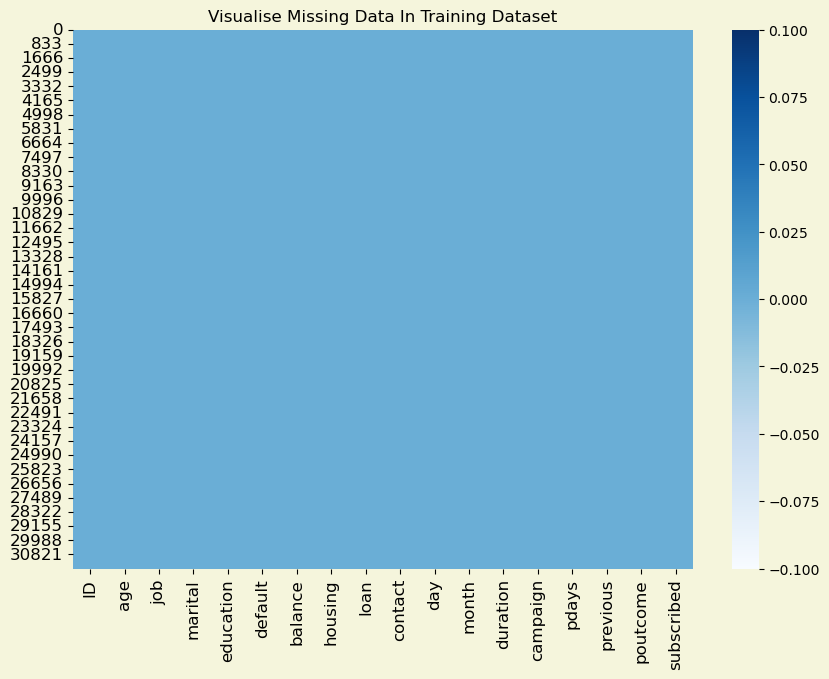

In [9]:
# Visualize missing data
plt.figure(figsize=(10,7), facecolor='beige')
sns.heatmap(df_train.isnull(), cmap='Blues')
plt.title("Visualise Missing Data In Training Dataset")
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

We can confirm that there is no missing data in the training dataset.

In [10]:
# checking missing data in the test dataset
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

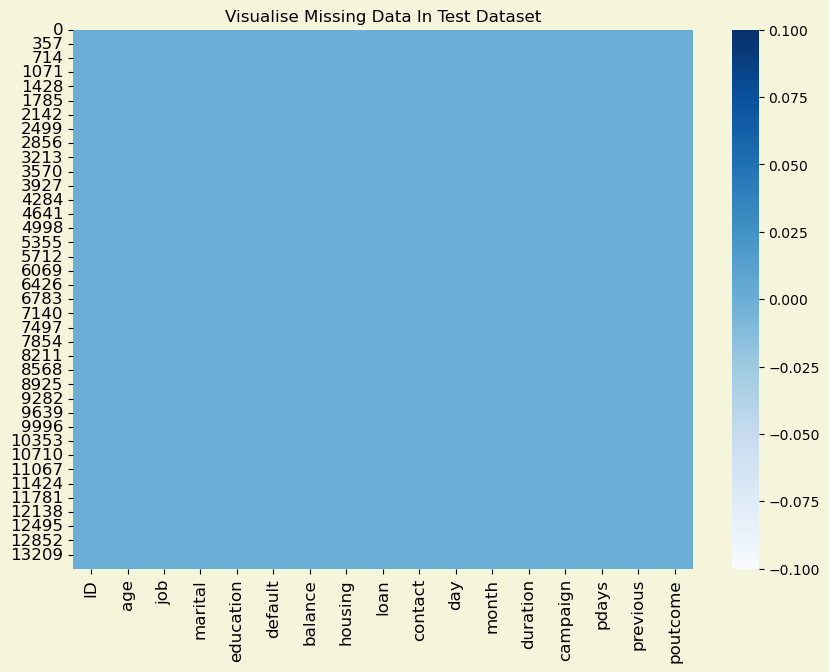

In [11]:
# Visualise missing value for the test dataset
plt.figure(figsize=(10,7), facecolor='beige')
sns.heatmap(df_test.isnull(), cmap='Blues')
plt.title("Visualise Missing Data In Test Dataset")
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

Hare also we can confirm that there is no missing data in the dataset.

In [12]:
# Checking no of unique value in the traing dataset
df_train.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

We can notice the no of unique value present in the dataset.

In [13]:
# checking unique value present in the traing dataset
for i in df_train.columns:
    print("Column name:",i)
    print(df_train[i].unique(),"\n")

Column name: ID
[26110 40576 15320 ... 19710 38556 14156] 

Column name: age
[56 31 27 57 33 50 45 35 36 44 39 43 41 53 64 48 60 29 30 42 46 32 63 47
 49 52 68 26 58 38 54 40 59 24 37 34 61 55 20 69 25 62 22 51 28 70 66 23
 87 71 74 81 73 76 72 84 19 79 75 21 83 80 67 18 77 65 82 86 78 88 92 95
 93 89 94 90] 

Column name: job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed'] 

Column name: marital
['married' 'divorced' 'single'] 

Column name: education
['unknown' 'secondary' 'tertiary' 'primary'] 

Column name: default
['no' 'yes'] 

Column name: balance
[1933    3  891 ... 2787 8741 2968] 

Column name: housing
['no' 'yes'] 

Column name: loan
['no' 'yes'] 

Column name: contact
['telephone' 'cellular' 'unknown'] 

Column name: day
[19 20 18 22  4  2  3  8 15  5 28  6 14  7 24 13  9 11 21 12 30 27 17 16
 25 10  1 29 26 31 23] 

Column name: month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' '

We can notice all the unique value present in the dataset.

In [14]:
# Checking for value counts in the training dataset
for i in df_train.columns:
    print(df_train[i].value_counts())

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
no     31062
yes      585
Name: default, dtype: int64
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 296

from the training dataset we can observe the unique value with its frequency.

In [15]:
# Checking no of unique value in the test dataset
df_test.nunique()

ID           13564
age             75
job             12
marital          3
education        4
default          2
balance       4292
housing          2
loan             2
contact          3
day             31
month           12
duration      1201
campaign        40
pdays          422
previous        33
poutcome         4
dtype: int64

We can notice that the no of unique value present in the test dataset.

In [16]:
# Checking the unique value present in the test dataset
for i in df_test.columns:
    print("Column Name:",i)
    print(df_test[i].unique(),"\n")

Column Name: ID
[38441 40403  3709 ... 28292 45163 34839] 

Column Name: age
[32 78 31 57 45 33 37 36 50 34 40 35 53 59 27 46 58 54 51 26 56 38 48 39
 41 29 43 25 42 47 30 44 28 49 20 60 24 52 55 61 62 64 65 63 66 68 77 69
 87 79 21 73 19 82 22 74 83 85 70 23 95 93 67 18 75 71 80 72 81 86 84 92
 76 89 90] 

Column Name: job
['services' 'retired' 'self-employed' 'blue-collar' 'management'
 'technician' 'admin.' 'unemployed' 'housemaid' 'entrepreneur' 'student'
 'unknown'] 

Column Name: marital
['married' 'divorced' 'single'] 

Column Name: education
['secondary' 'primary' 'tertiary' 'unknown'] 

Column Name: default
['no' 'yes'] 

Column Name: balance
[ 118 2787  144 ... 1805 3495 4256] 

Column Name: housing
['yes' 'no'] 

Column Name: loan
['no' 'yes'] 

Column Name: contact
['cellular' 'telephone' 'unknown'] 

Column Name: day
[15  1 16 13  3 22  5  2 25 21  7  9  6  4 14 27  8 30 28 31 29 10 23 26
 12 17 20 11 19 18 24] 

Column Name: month
['may' 'jul' 'jun' 'mar' 'feb' 'sep' 'aug

We can notice the all unique value present in the test dataset.

In [17]:
# Checking value counts in the test dataset
for i in df_test.columns:
    print(df_test[i].value_counts())

38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64
32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64
married     8119
single      3868
divorced    1577
Name: marital, dtype: int64
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64
no     13334
yes      230
Name: default, dtype: int64
 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: balance, Len

We can notice all the unique value with its frequency in the test dataset.

In [18]:
# Data types of each column in training dataset
df_train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [19]:
# Data types in test data set
df_test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [20]:
# Checking Statistical Summary
df_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


From the statistical summary of the numerical column we can notice that
1. count of each numerical column is same. which means there is no missing data present in the numerical column in the train dataset.
2. Mean is greater than median in balance, duration, pdays column. which means these columns are right skewed.
3. the difference between 75th percentile and maximum value is high as compared to the differences between 50 to 75 percentile , 25 to 50 percentile and mim to 25 th percentile. which refers to the presence of outliers in the dataset.

In [21]:
# as customer id is unique value for each customer and it does no help to predict the data hence we can drop this id column
df_train.drop("ID", axis=1, inplace=True)
df_test.drop("ID", axis=1, inplace=True)

In [22]:
# Seperating Numerical column and categorical columns
categorical_col=[]
numerical_col=[]
for i in df_train.dtypes.index:
    if df_train.dtypes[i]=="object":
        categorical_col.append(i)
    else:
        numerical_col.append(i)
print("Categorical Column :",categorical_col,"\n")
print("Numerical Column: ",numerical_col)

Categorical Column : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed'] 

Numerical Column:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Now we got catecorical column and numerical column seperately so that we can analysis as per our needed.

## Data Analysis

#### Univariate Data Analysis

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


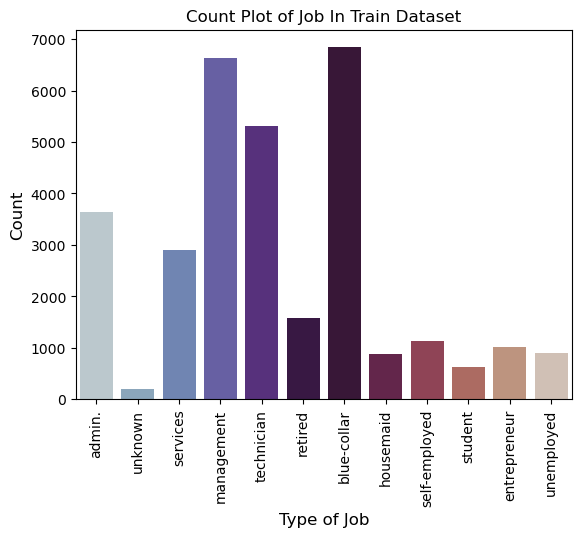

In [23]:
# count of data of job in the traing data
print(df_train['job'].value_counts())
sns.countplot(data=df_train, x='job', palette='twilight')
plt.title("Count Plot of Job In Train Dataset")
plt.xlabel("Type of Job", fontsize=12)
plt.xticks(fontsize=10, rotation=90)
plt.ylabel("Count", fontsize=12)
plt.yticks(rotation=0, fontsize=10)
plt.show()

Most of the person do job in type of blue-collar, technician, management, service and admin job. wheather a few person does housemaid, self employed, unemployed, entrepreneur, student, retired job. A very few person are unknown to their job. 

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


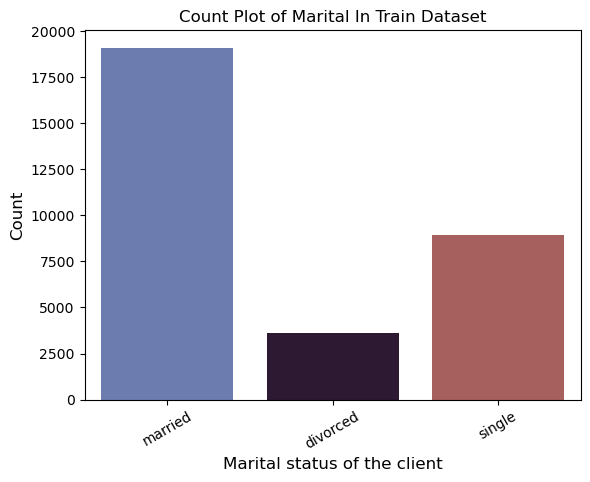

In [24]:
# count of data of marital in the traing data
print(df_train['marital'].value_counts())
sns.countplot(data=df_train, x='marital', palette='twilight')
plt.title("Count Plot of Marital In Train Dataset")
plt.xlabel("Marital status of the client", fontsize=12)
plt.xticks(fontsize=10, rotation=30)
plt.ylabel("Count", fontsize=12)
plt.yticks(rotation=0, fontsize=10)
plt.show()

In the training dataset we can see that most of the customer of bank is married. then a few customer is single and devorced.

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


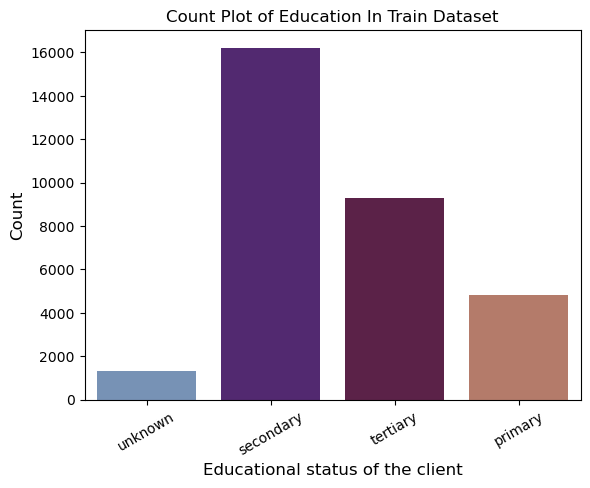

In [25]:
# count of data of Education in the traing data
print(df_train['education'].value_counts())
sns.countplot(data=df_train, x='education', palette='twilight')
plt.title("Count Plot of Education In Train Dataset")
plt.xlabel("Educational status of the client", fontsize=12)
plt.xticks(fontsize=10, rotation=30)
plt.ylabel("Count", fontsize=12)
plt.yticks(rotation=0, fontsize=10)
plt.show()

We can notice that most of the customer studies upto secondary. a few customer studies to tertiary and primary education. whereas very few customer has no updated their education.

no     31062
yes      585
Name: default, dtype: int64


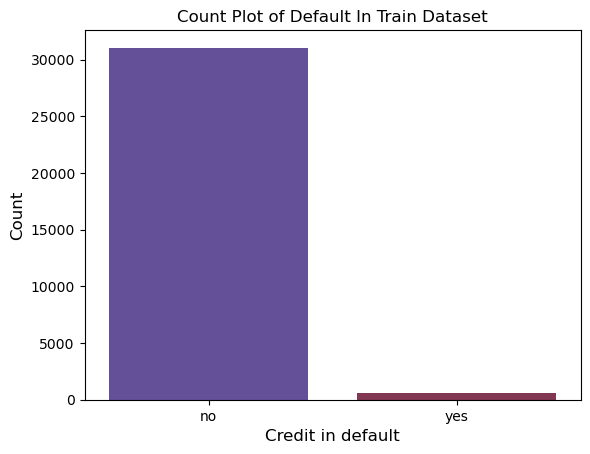

In [26]:
# count of data of default in the traing data
print(df_train['default'].value_counts())
sns.countplot(data=df_train, x='default', palette='twilight')
plt.title("Count Plot of Default In Train Dataset")
plt.xlabel("Credit in default", fontsize=12)
plt.xticks(fontsize=10, rotation=0)
plt.ylabel("Count", fontsize=12)
plt.yticks(rotation=0, fontsize=10)
plt.show()

There are most of the customer are non defaulter in terms of credit. there are very few customer are defaulter in terms of credit.

yes    17584
no     14063
Name: housing, dtype: int64


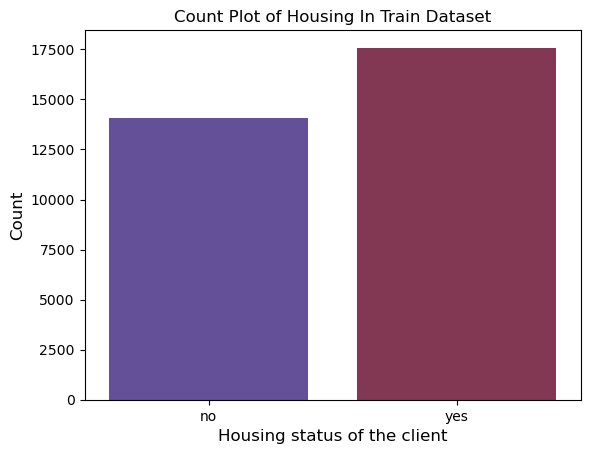

In [27]:
# count of data of housing in the traing data
print(df_train['housing'].value_counts())
sns.countplot(data=df_train, x='housing', palette='twilight')
plt.title("Count Plot of Housing In Train Dataset")
plt.xlabel("Housing status of the client", fontsize=12)
plt.xticks(fontsize=10, rotation=0)
plt.ylabel("Count", fontsize=12)
plt.yticks(rotation=0, fontsize=10)
plt.show()

The no of customer those who having house is 17584 and those who does no have house is 14063. 

no     26516
yes     5131
Name: loan, dtype: int64


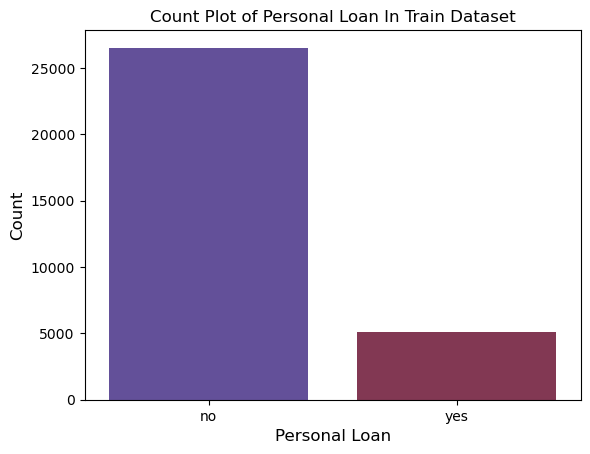

In [28]:
# count of data of loan in the traing data
print(df_train['loan'].value_counts())
sns.countplot(data=df_train, x='loan', palette='twilight')
plt.title("Count Plot of Personal Loan In Train Dataset")
plt.xlabel("Personal Loan", fontsize=12)
plt.xticks(fontsize=10, rotation=0)
plt.ylabel("Count", fontsize=12)
plt.yticks(rotation=0, fontsize=10)
plt.show()

Most of the customer does not have any personal loan. There are 5131 coustomer those have personal loan.

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


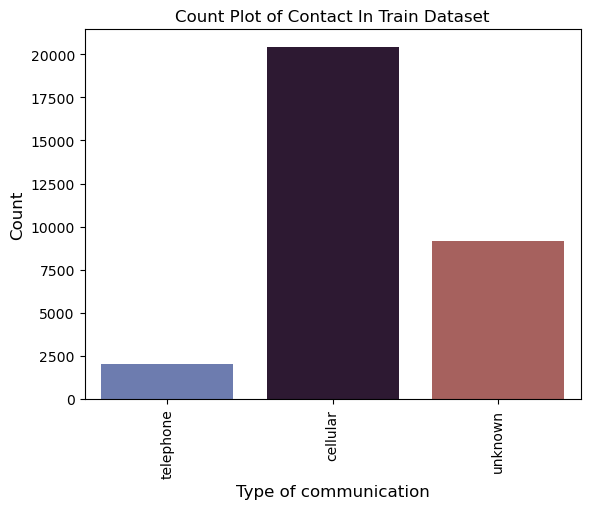

In [29]:
# count of data of contact in the traing data
print(df_train['contact'].value_counts())
sns.countplot(data=df_train, x='contact', palette='twilight')
plt.title("Count Plot of Contact In Train Dataset")
plt.xlabel("Type of communication", fontsize=12)
plt.xticks(fontsize=10, rotation=90)
plt.ylabel("Count", fontsize=12)
plt.yticks(rotation=0, fontsize=10)
plt.show()

Mode of communication of 20423 customers is celluar and 2047 customer is telephonic. There are 9177 customer those who mode of communication is unknown to bank. 

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


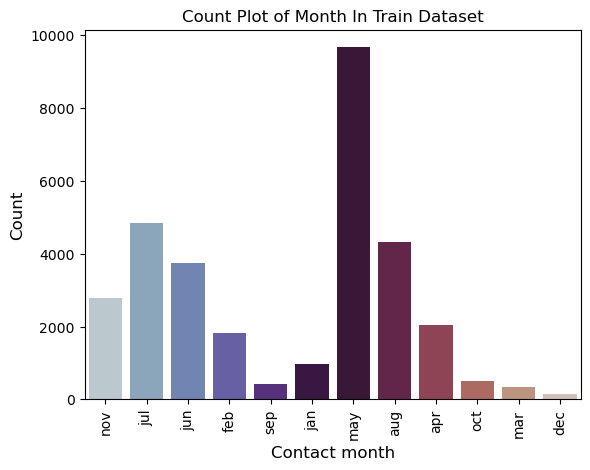

In [30]:
# count of data of month in the traing data
print(df_train['month'].value_counts())
sns.countplot(data=df_train, x='month', palette='twilight')
plt.title("Count Plot of Month In Train Dataset")
plt.xlabel("Contact month", fontsize=12)
plt.xticks(fontsize=10, rotation=90)
plt.ylabel("Count", fontsize=12)
plt.yticks(rotation=0, fontsize=10)
plt.show()

Most of the customer contacted the bank in may, july, june, august, and november. A few customers contacted bank in january,february,april month. and there are very few contact in september, october, march and december. 

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


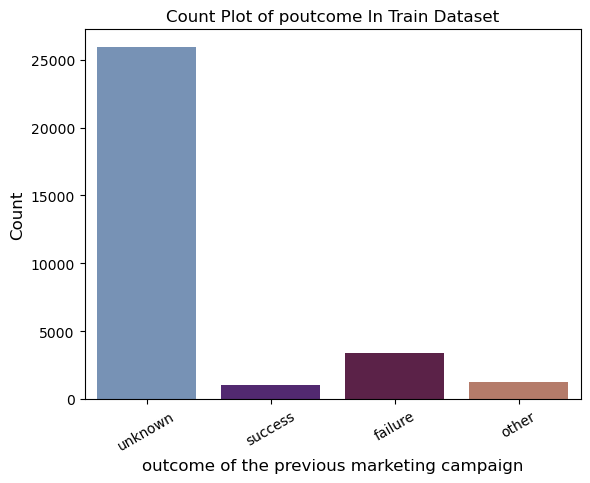

In [31]:
# count of data of poutcome in the traing data
print(df_train['poutcome'].value_counts())
sns.countplot(data=df_train, x='poutcome', palette='twilight')
plt.title("Count Plot of poutcome In Train Dataset")
plt.xlabel("outcome of the previous marketing campaign", fontsize=12)
plt.xticks(fontsize=10, rotation=30)
plt.ylabel("Count", fontsize=12)
plt.yticks(rotation=0, fontsize=10)
plt.show()

There are huge data which is unknown to bank about their previous marketing campaign. in compared with unknown data there are very few data about previous year outcome which is sucess, failure and other.

no     27932
yes     3715
Name: subscribed, dtype: int64


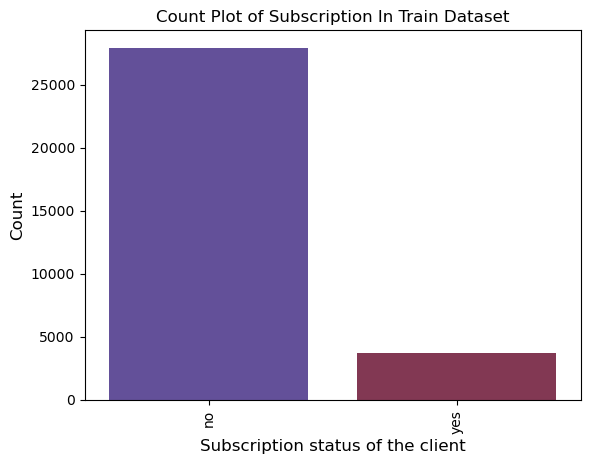

In [32]:
# count of data of subscribed in the traing data
print(df_train['subscribed'].value_counts())
sns.countplot(data=df_train, x='subscribed', palette='twilight')
plt.title("Count Plot of Subscription In Train Dataset")
plt.xlabel("Subscription status of the client", fontsize=12)
plt.xticks(fontsize=10, rotation=90)
plt.ylabel("Count", fontsize=12)
plt.yticks(rotation=0, fontsize=10)
plt.show()

There is very less data of yes subcription data as compared to no subcription data

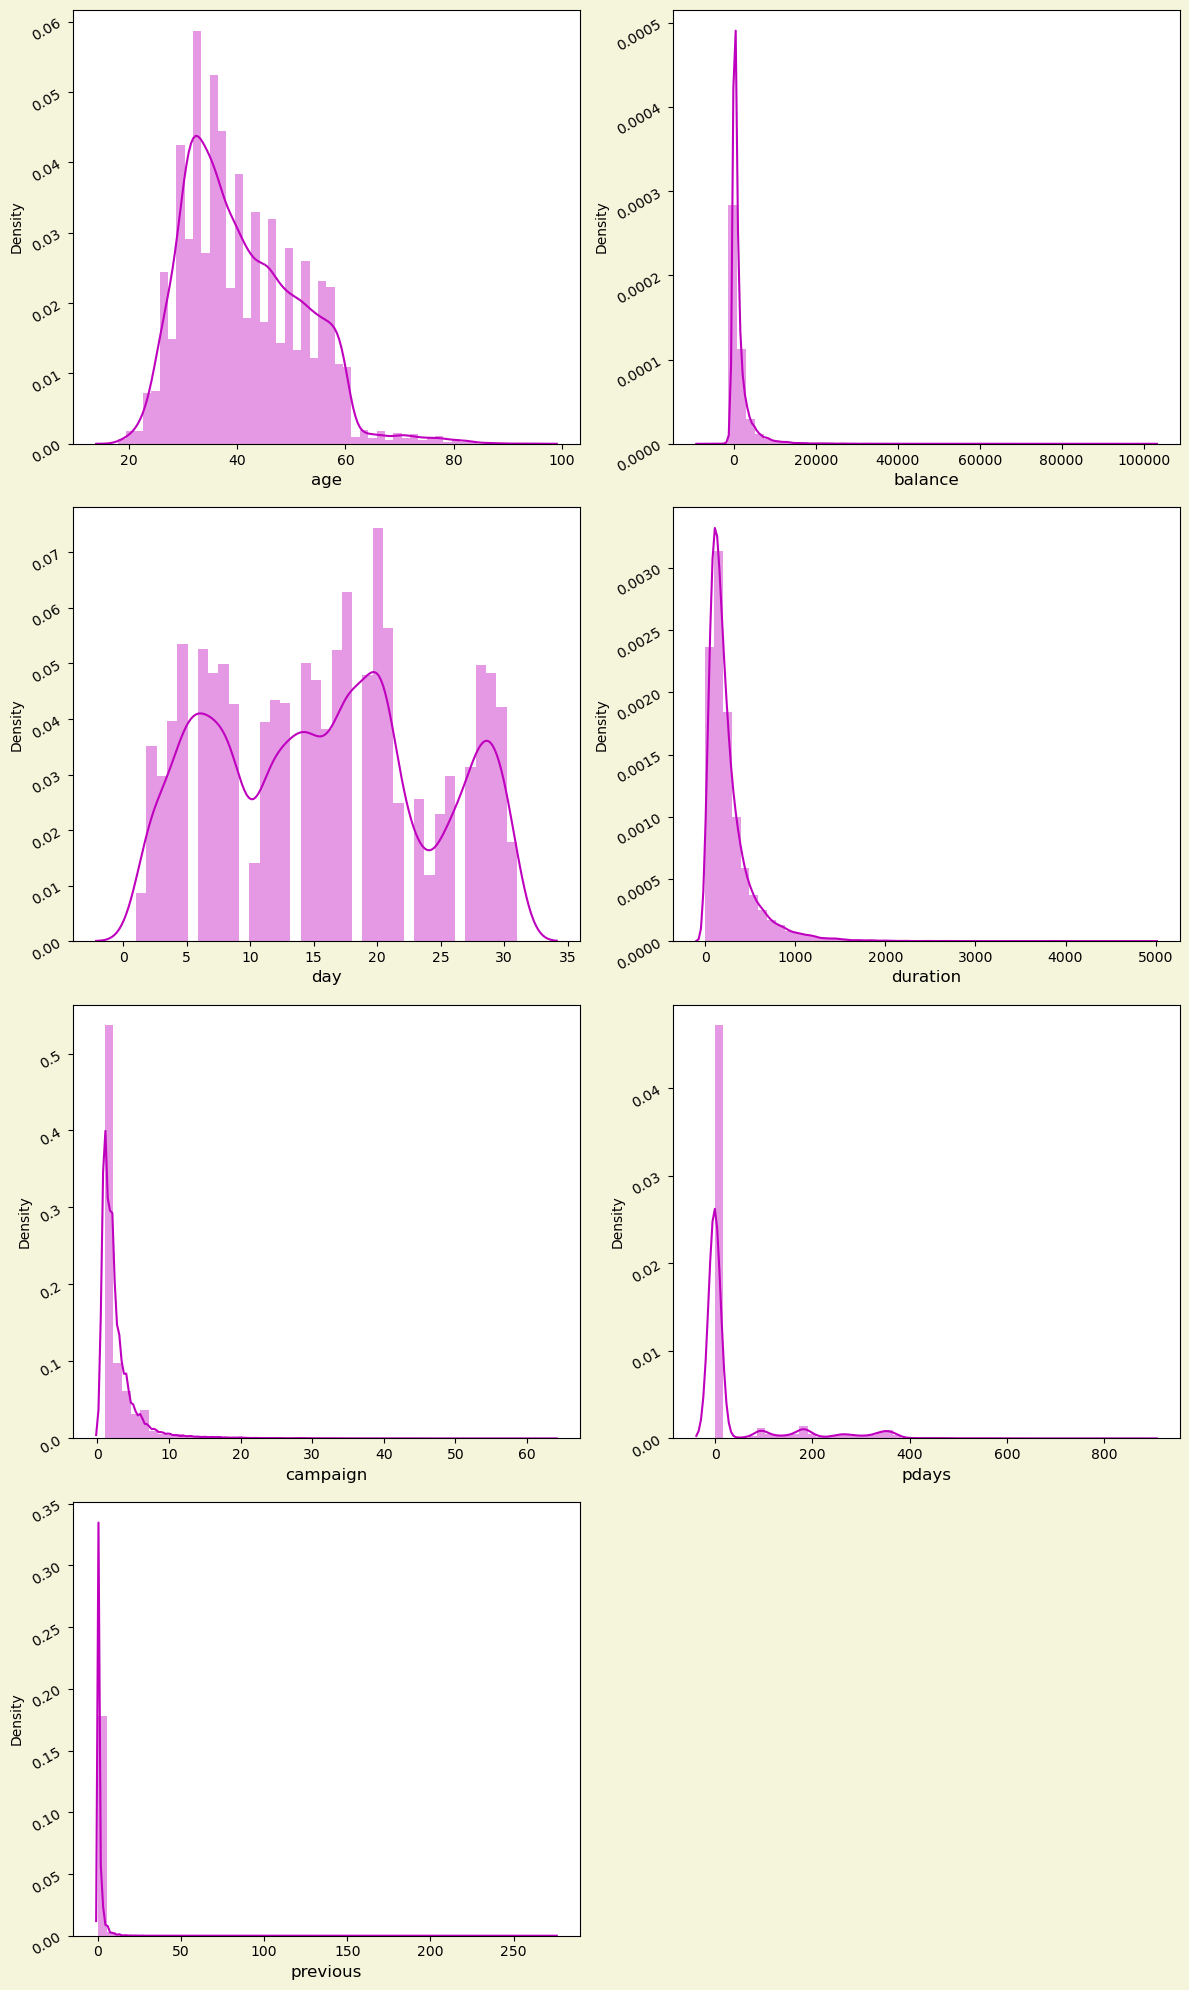

In [33]:
# univariate analysis on numeric data
#lets check how the data has been distributed in remaing numerical column
plt.figure(figsize=(12,20),facecolor='beige')
plotnumber=1
for col in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(df_train[col],color='m')
        plt.yticks(rotation=30,fontsize=10)
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We can observe that age column and day column is almost normally distributed. Balance, duration, campaign, pdays and previous columns are skewed to right.

### Bivariate Analysis

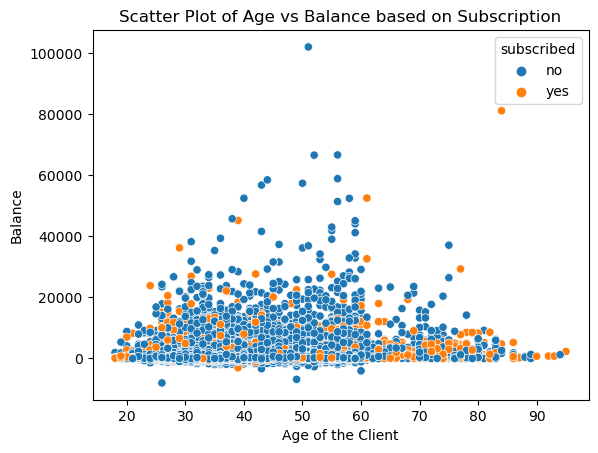

In [34]:
#Checking scatter plot of age vs balance with respect to subcription
plt.title("Scatter Plot of Age vs Balance based on Subscription")
sns.scatterplot(x='age',y='balance',hue='subscribed',data=df_train)
plt.xlabel("Age of the Client", fontsize=10)
plt.ylabel("Balance", fontsize=10)
plt.show()

Most of the customer maintain their balance with in 20000 in every group of aged person.

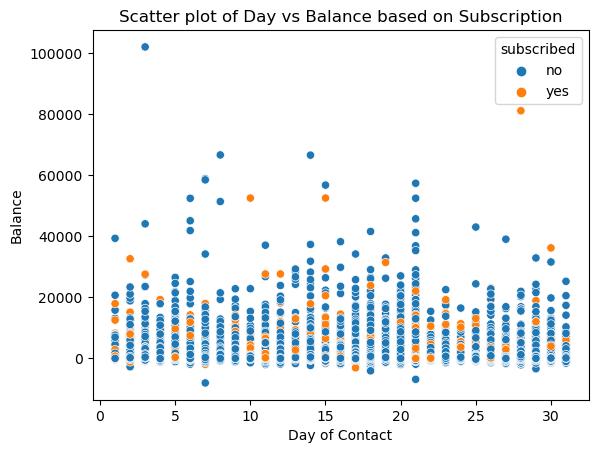

In [35]:
# Checking scatter plot of day vs balance based on subscription
plt.title("Scatter plot of Day vs Balance based on Subscription")
sns.scatterplot(x='day', y='balance', hue='subscribed', data=df_train)
plt.xlabel("Day of Contact")
plt.ylabel("Balance")
plt.show()

Most of the customer have balance in bank is less than 20000 wheather it does not matter for which day of contact made.


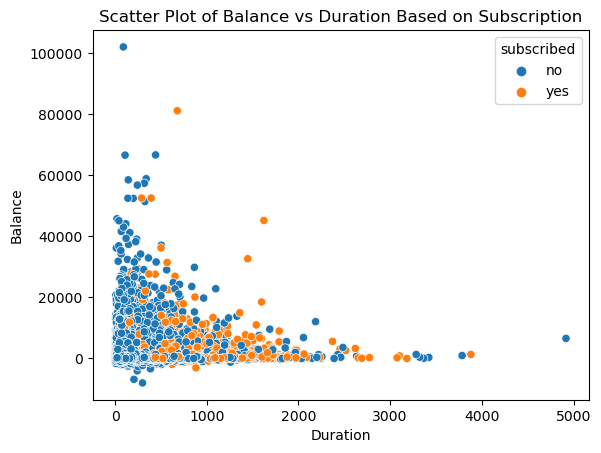

In [36]:
# Checking scatter plot of balance vs duration based on subscription
plt.title("Scatter Plot of Balance vs Duration Based on Subscription")
sns.scatterplot(x='duration',y='balance', hue='subscribed', data=df_train)
plt.xlabel("Duration")
plt.ylabel("Balance")
plt.show()

Duration of contact is generally high for subscribed customer.

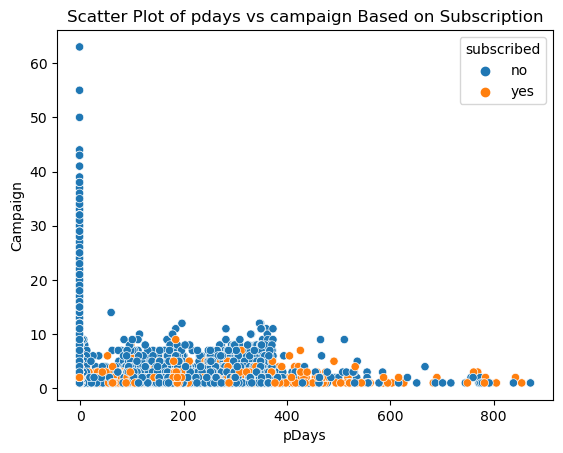

In [37]:
# Checking scatter plot of balance vs duration based on subscription
plt.title("Scatter Plot of pdays vs campaign Based on Subscription")
sns.scatterplot(x='pdays',y='campaign', hue='subscribed', data=df_train)
plt.xlabel("pDays")
plt.ylabel("Campaign")
plt.show()

No relation found between campaign and pdays based on subcription.

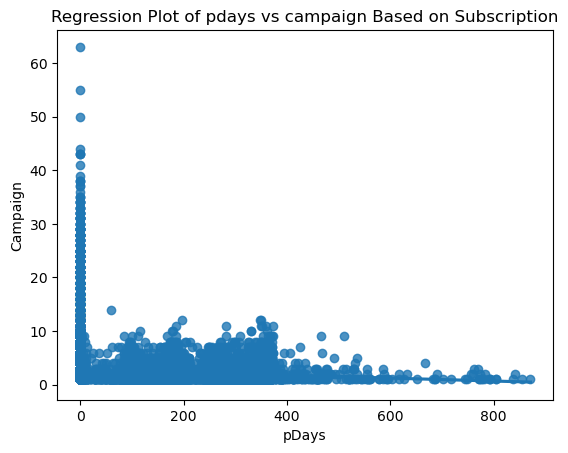

In [38]:
# Checking Regression plot of balance vs duration based on subscription
plt.title("Regression Plot of pdays vs campaign Based on Subscription")
sns.regplot(x='pdays',y='campaign', data=df_train)
plt.xlabel("pDays")
plt.ylabel("Campaign")
plt.show()

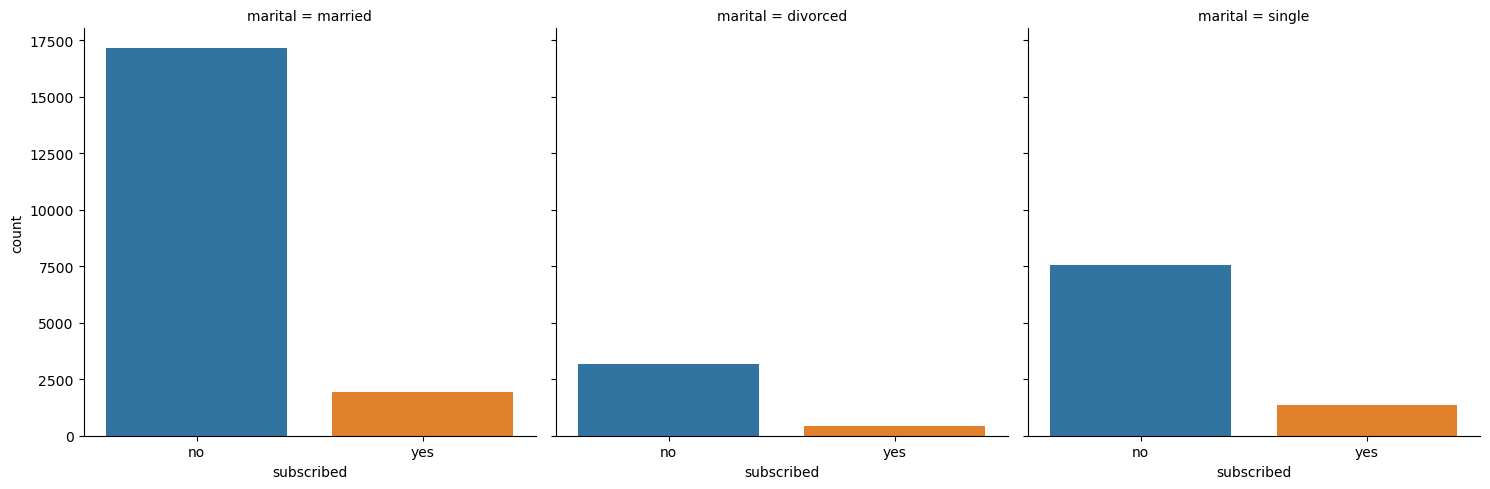

In [39]:
# checking marital status based on subscription
sns.catplot(x='subscribed', col=categorical_col[1], data=df_train, kind='count')
plt.show()

Hare we can notice that each column posseses different categorical data and based on that Count of subscription is categorized in yes no manner. Hare most of the married person has not subscribed then Single person and then divorsed person. Similarly Those person has subscribed are mostly married then single and then divorsed person.

<Figure size 6000x500 with 0 Axes>

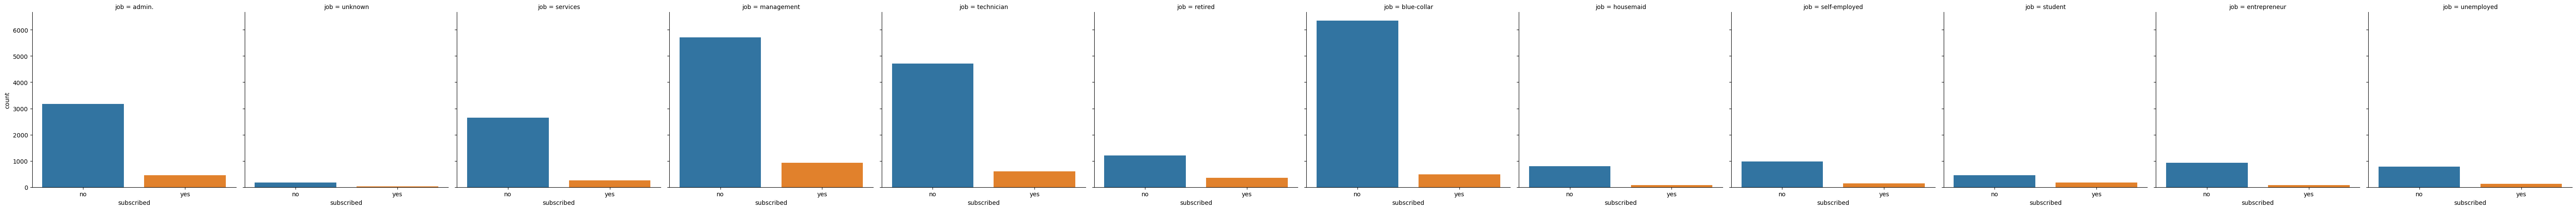

In [40]:
# Checking job based on subscription
plt.figure(figsize=(60,5))
sns.catplot(x='subscribed', col=categorical_col[0], data=df_train, kind='count')
plt.show()

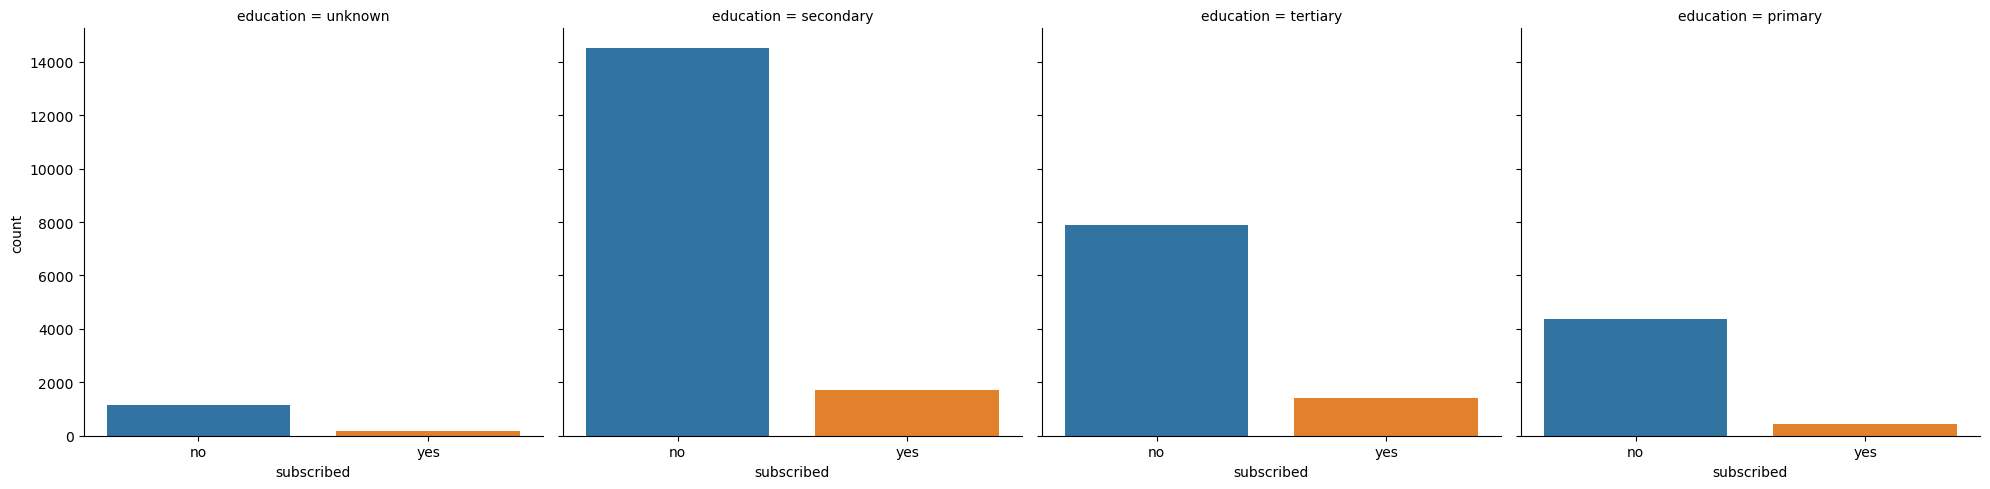

In [41]:
# Checking Education based on Subscription
sns.catplot(x='subscribed', col=categorical_col[2], data=df_train, kind='count')

Sequence of no subscribed person in terms of education is secondary, tertiary, primary and lastly unknown in decending order. similarly Yes Subscribed customer is sequenced in same manner.

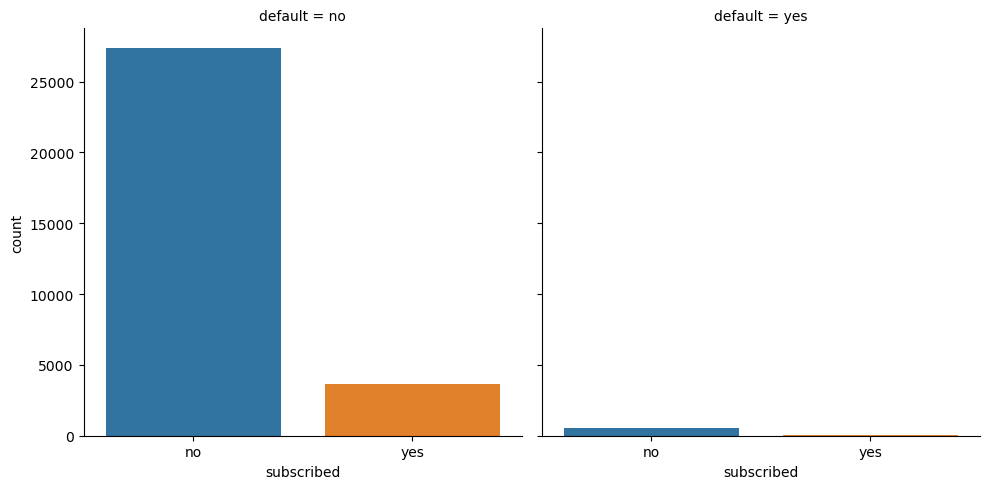

In [42]:
# Checking Defaulter based on dubscription
sns.catplot(x='subscribed', col=categorical_col[3], data=df_train, kind='count')

No defaulter client has not mostly subscribed as comperd to the yes subscribed client. 

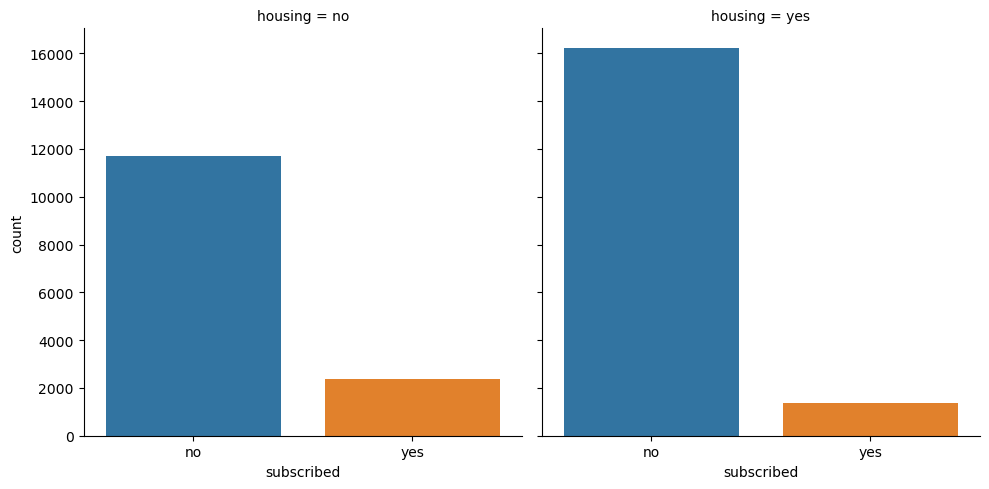

In [43]:
# Checking housing based on subscription
sns.catplot(x='subscribed', col=categorical_col[4], data=df_train, kind='count')

Yes housing client has mostly not suscribed as compared to the Yes subscribed client. Similarly in No Housing column there is mostly no suscribed client as compared to the yes subscribed client.

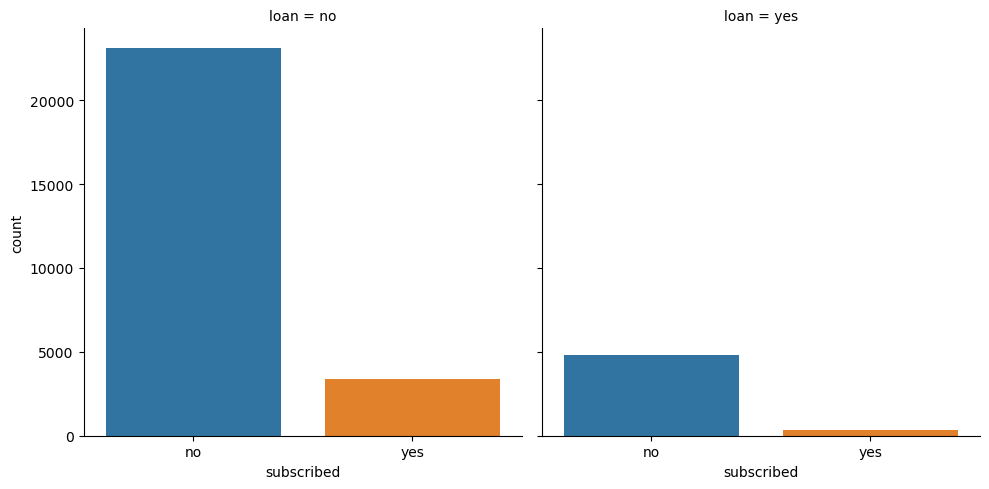

In [44]:
# Checking loan based on Subscription
sns.catplot(x='subscribed', col=categorical_col[5], data=df_train, kind='count')

in No Loan column there is mostly no subscribed column as compared to yes subscribed column. same thing repeats in Yes loan column.

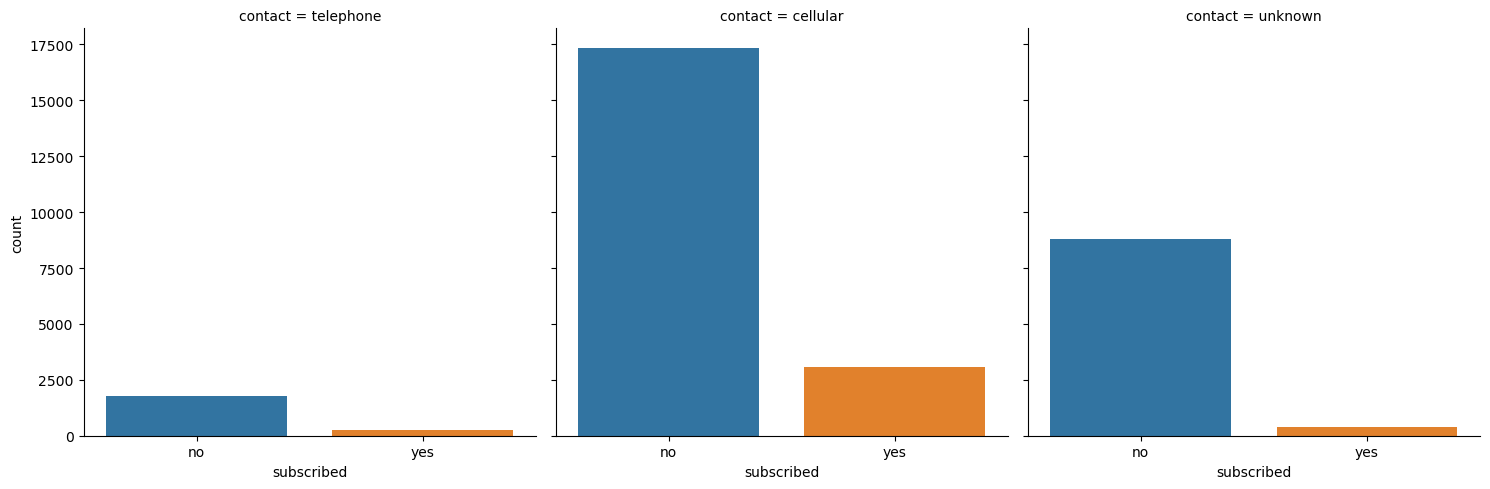

In [45]:
# Checking Contact Based on subscription
sns.catplot(x='subscribed', col=categorical_col[6], data=df_train, kind='count')

In Cellular contact column there is no subscribed client is higher side as compared to the yes subscribed client. Similar thing repeats in Unknown contact and Telephone contact column

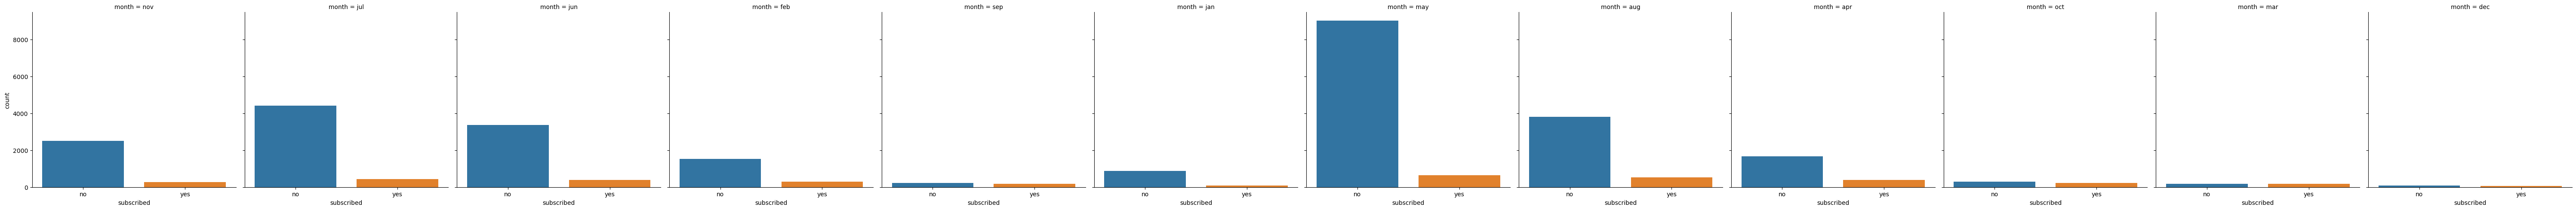

In [46]:
# Checking Month based on subscription
sns.catplot(x='subscribed', col=categorical_col[7], data=df_train, kind='count')

In twelve months There are no subscribed client is higher almost in every month as compared to the Yes subscribed client.

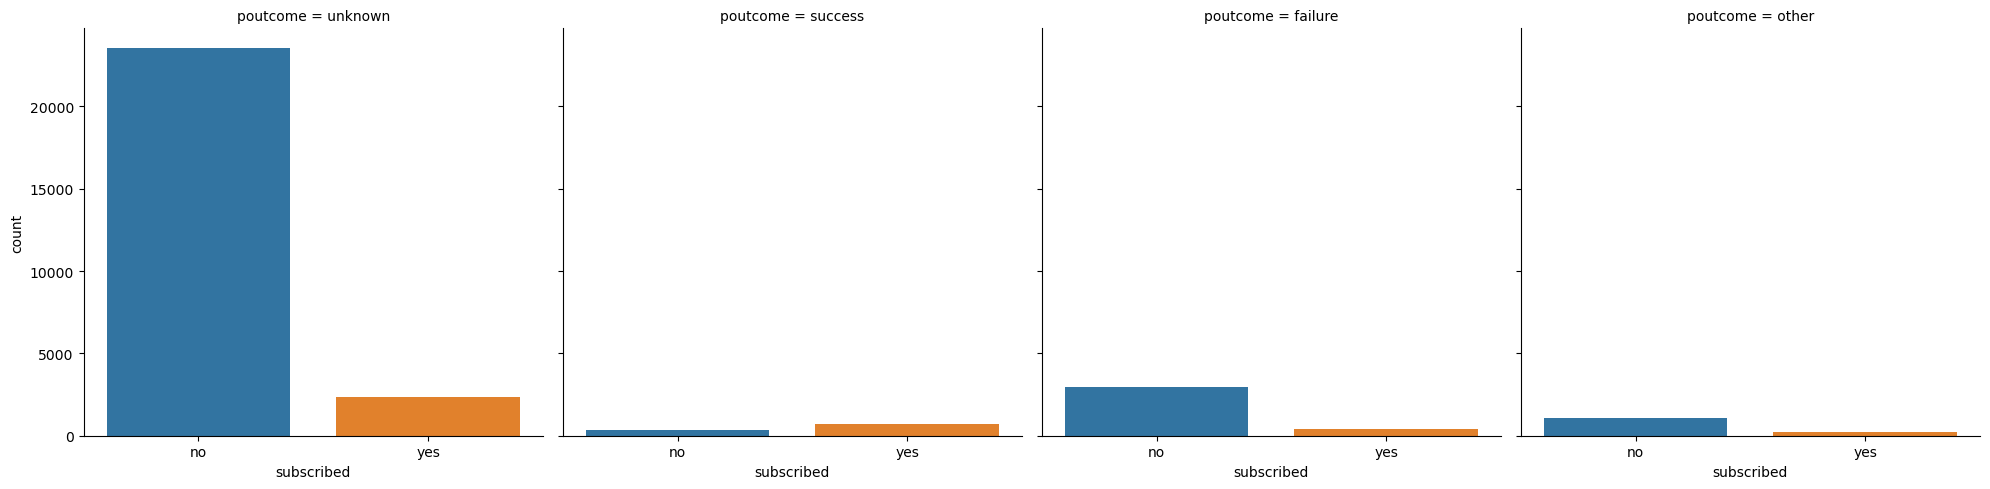

In [47]:
# Checking poutcome based on subscription
sns.catplot(x='subscribed', col=categorical_col[8], data=df_train, kind='count')

Poutcome is higher in no subscribed client as compared to yes subscribed client. similar thing repeats in Failure and others columns. where as yes subscribed client is higher in sucess column as compared to no subscribed column.

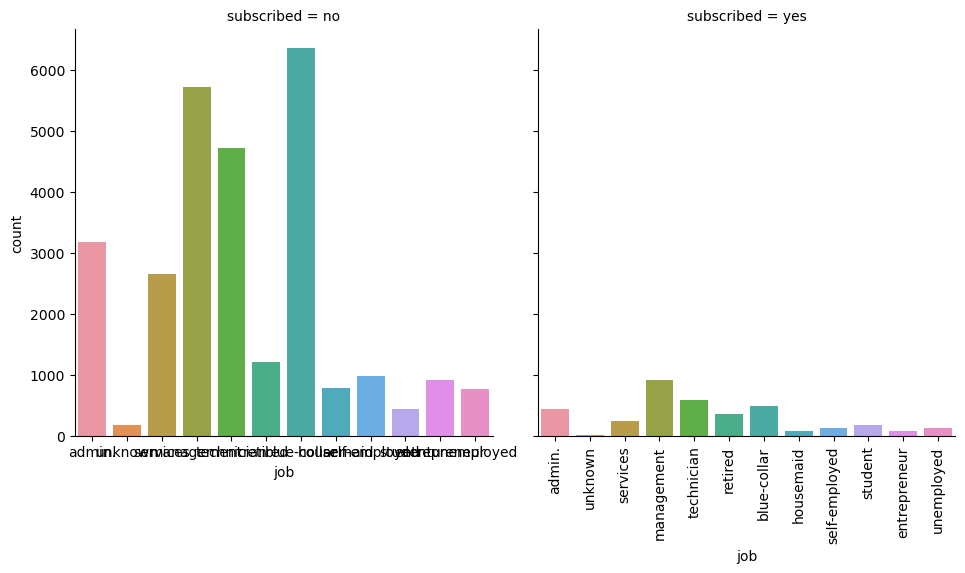

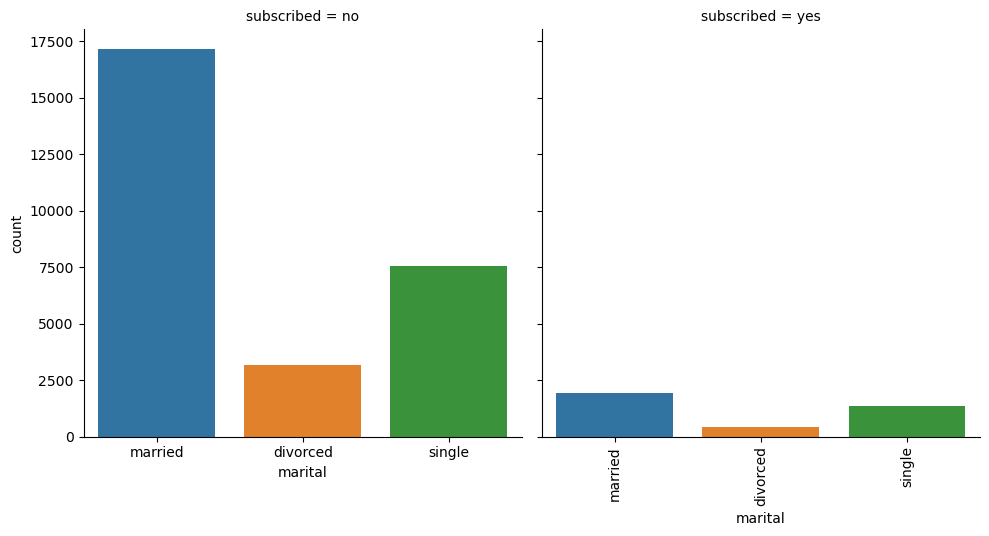

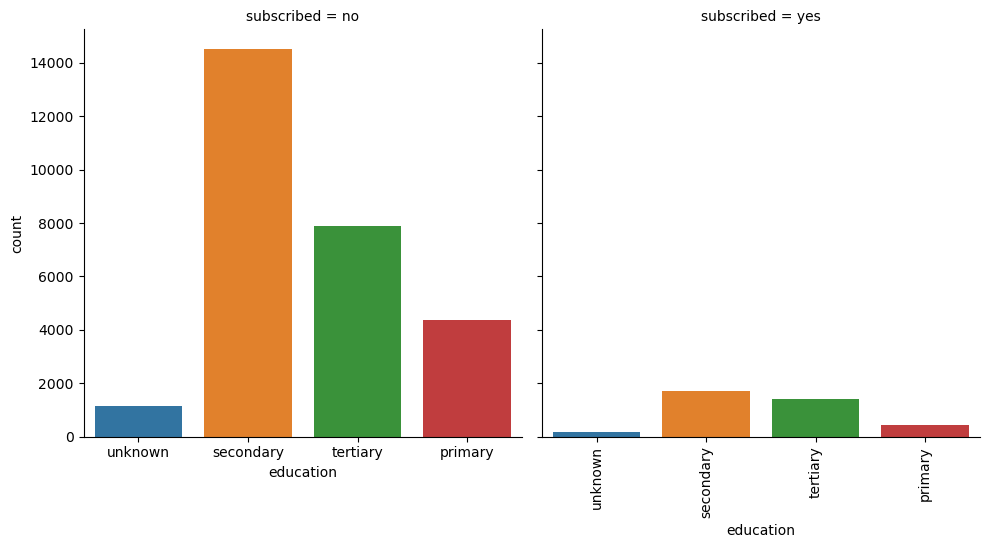

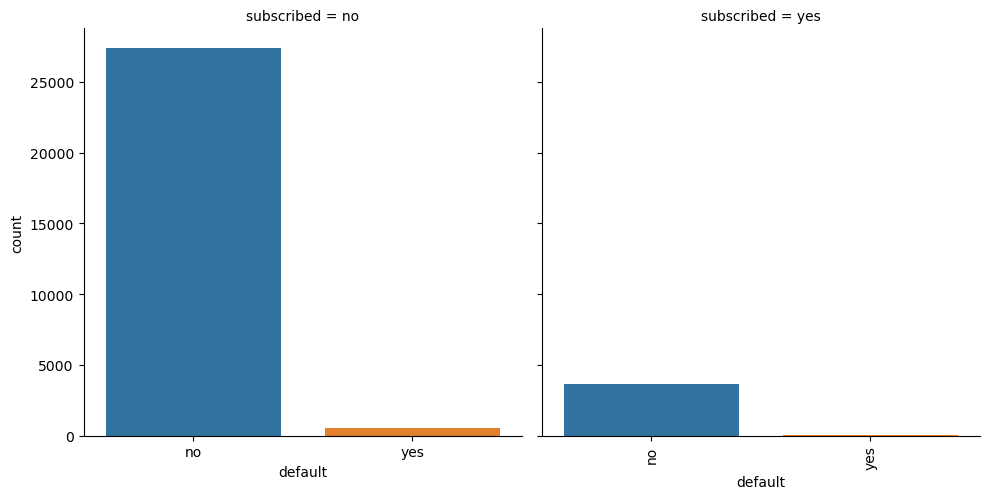

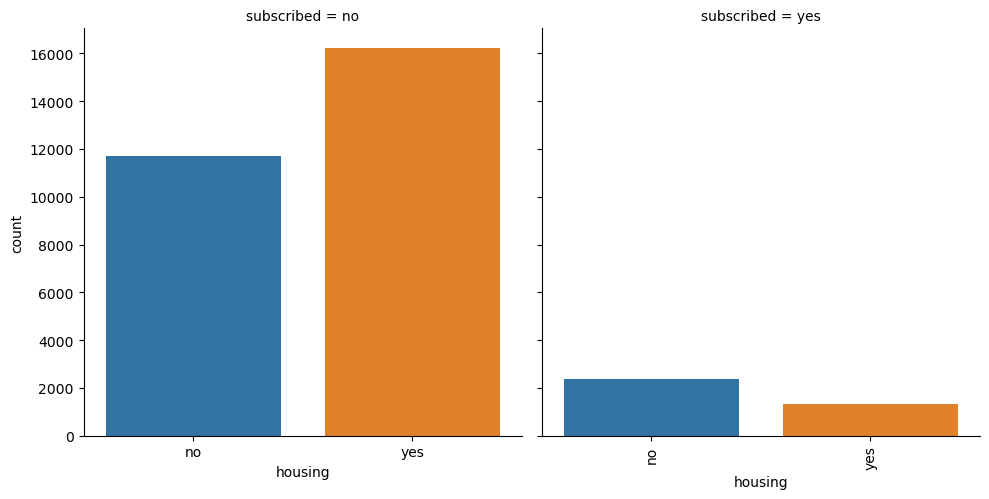

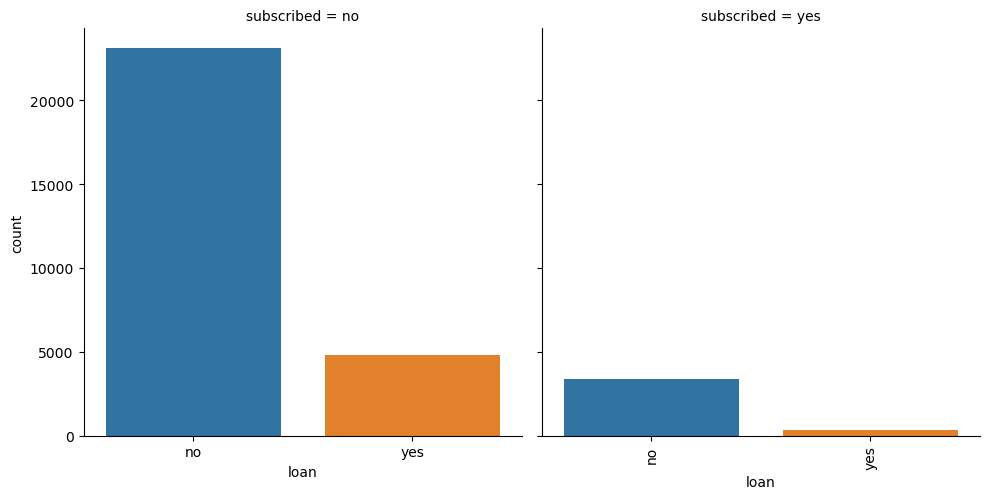

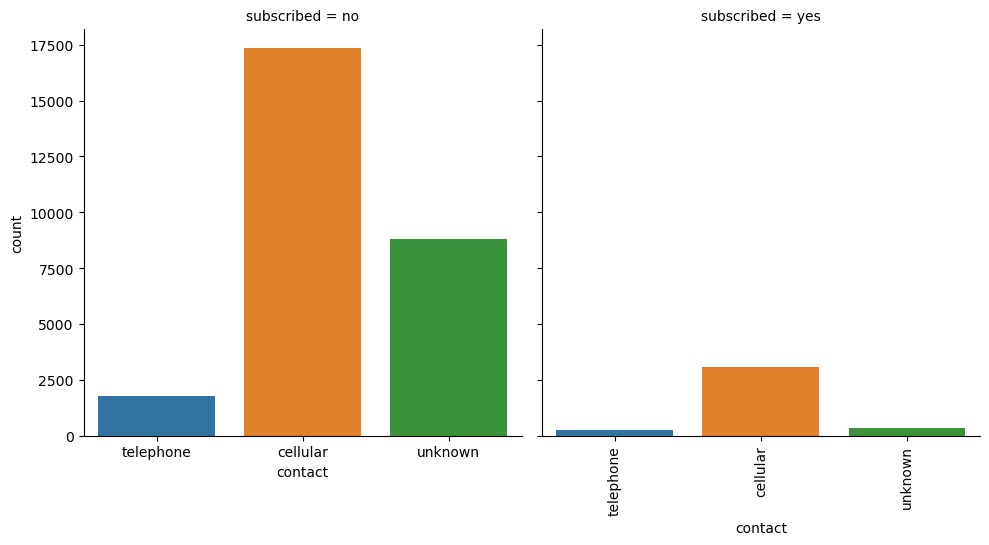

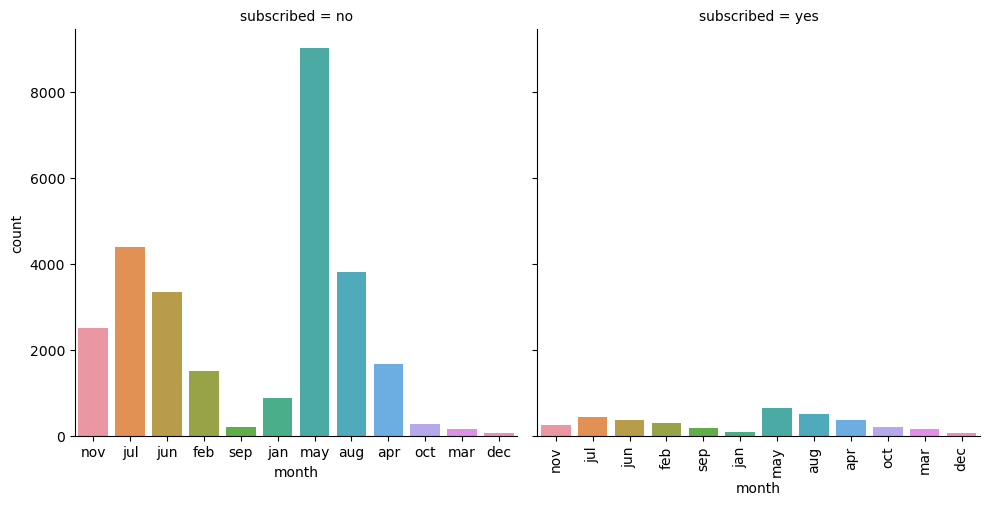

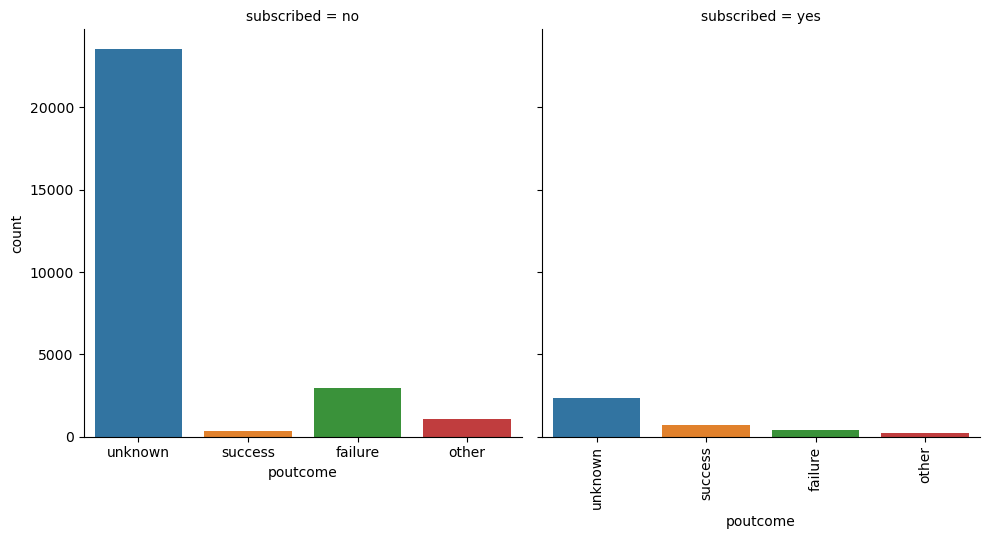

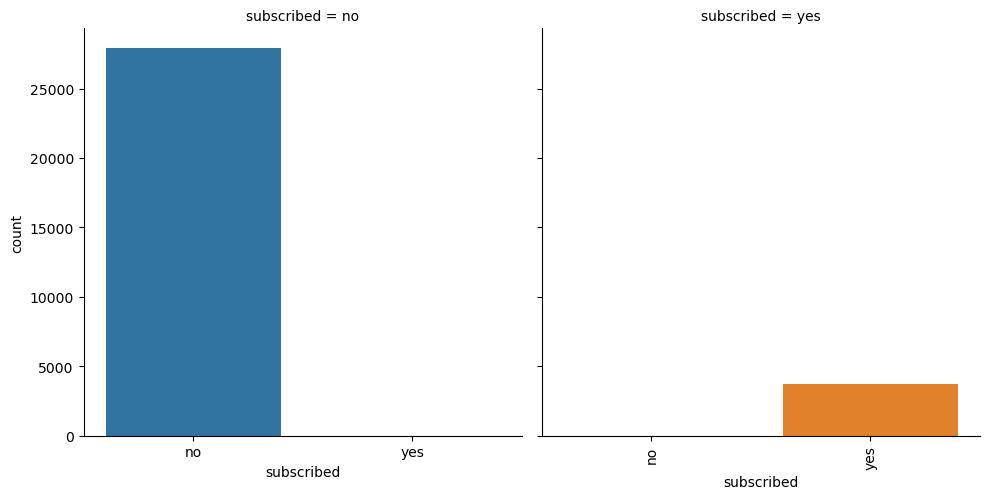

In [48]:
# Checking subscription lavel in each categotical column
for i in categorical_col:
    sns.catplot(col='subscribed', x=i, data=df_train, kind='count')
    plt.xticks(rotation=90)
plt.show()

In the above plot there is two column no subscribed and yes subscribed. and in each column barplot shows its count as per categori of the data.

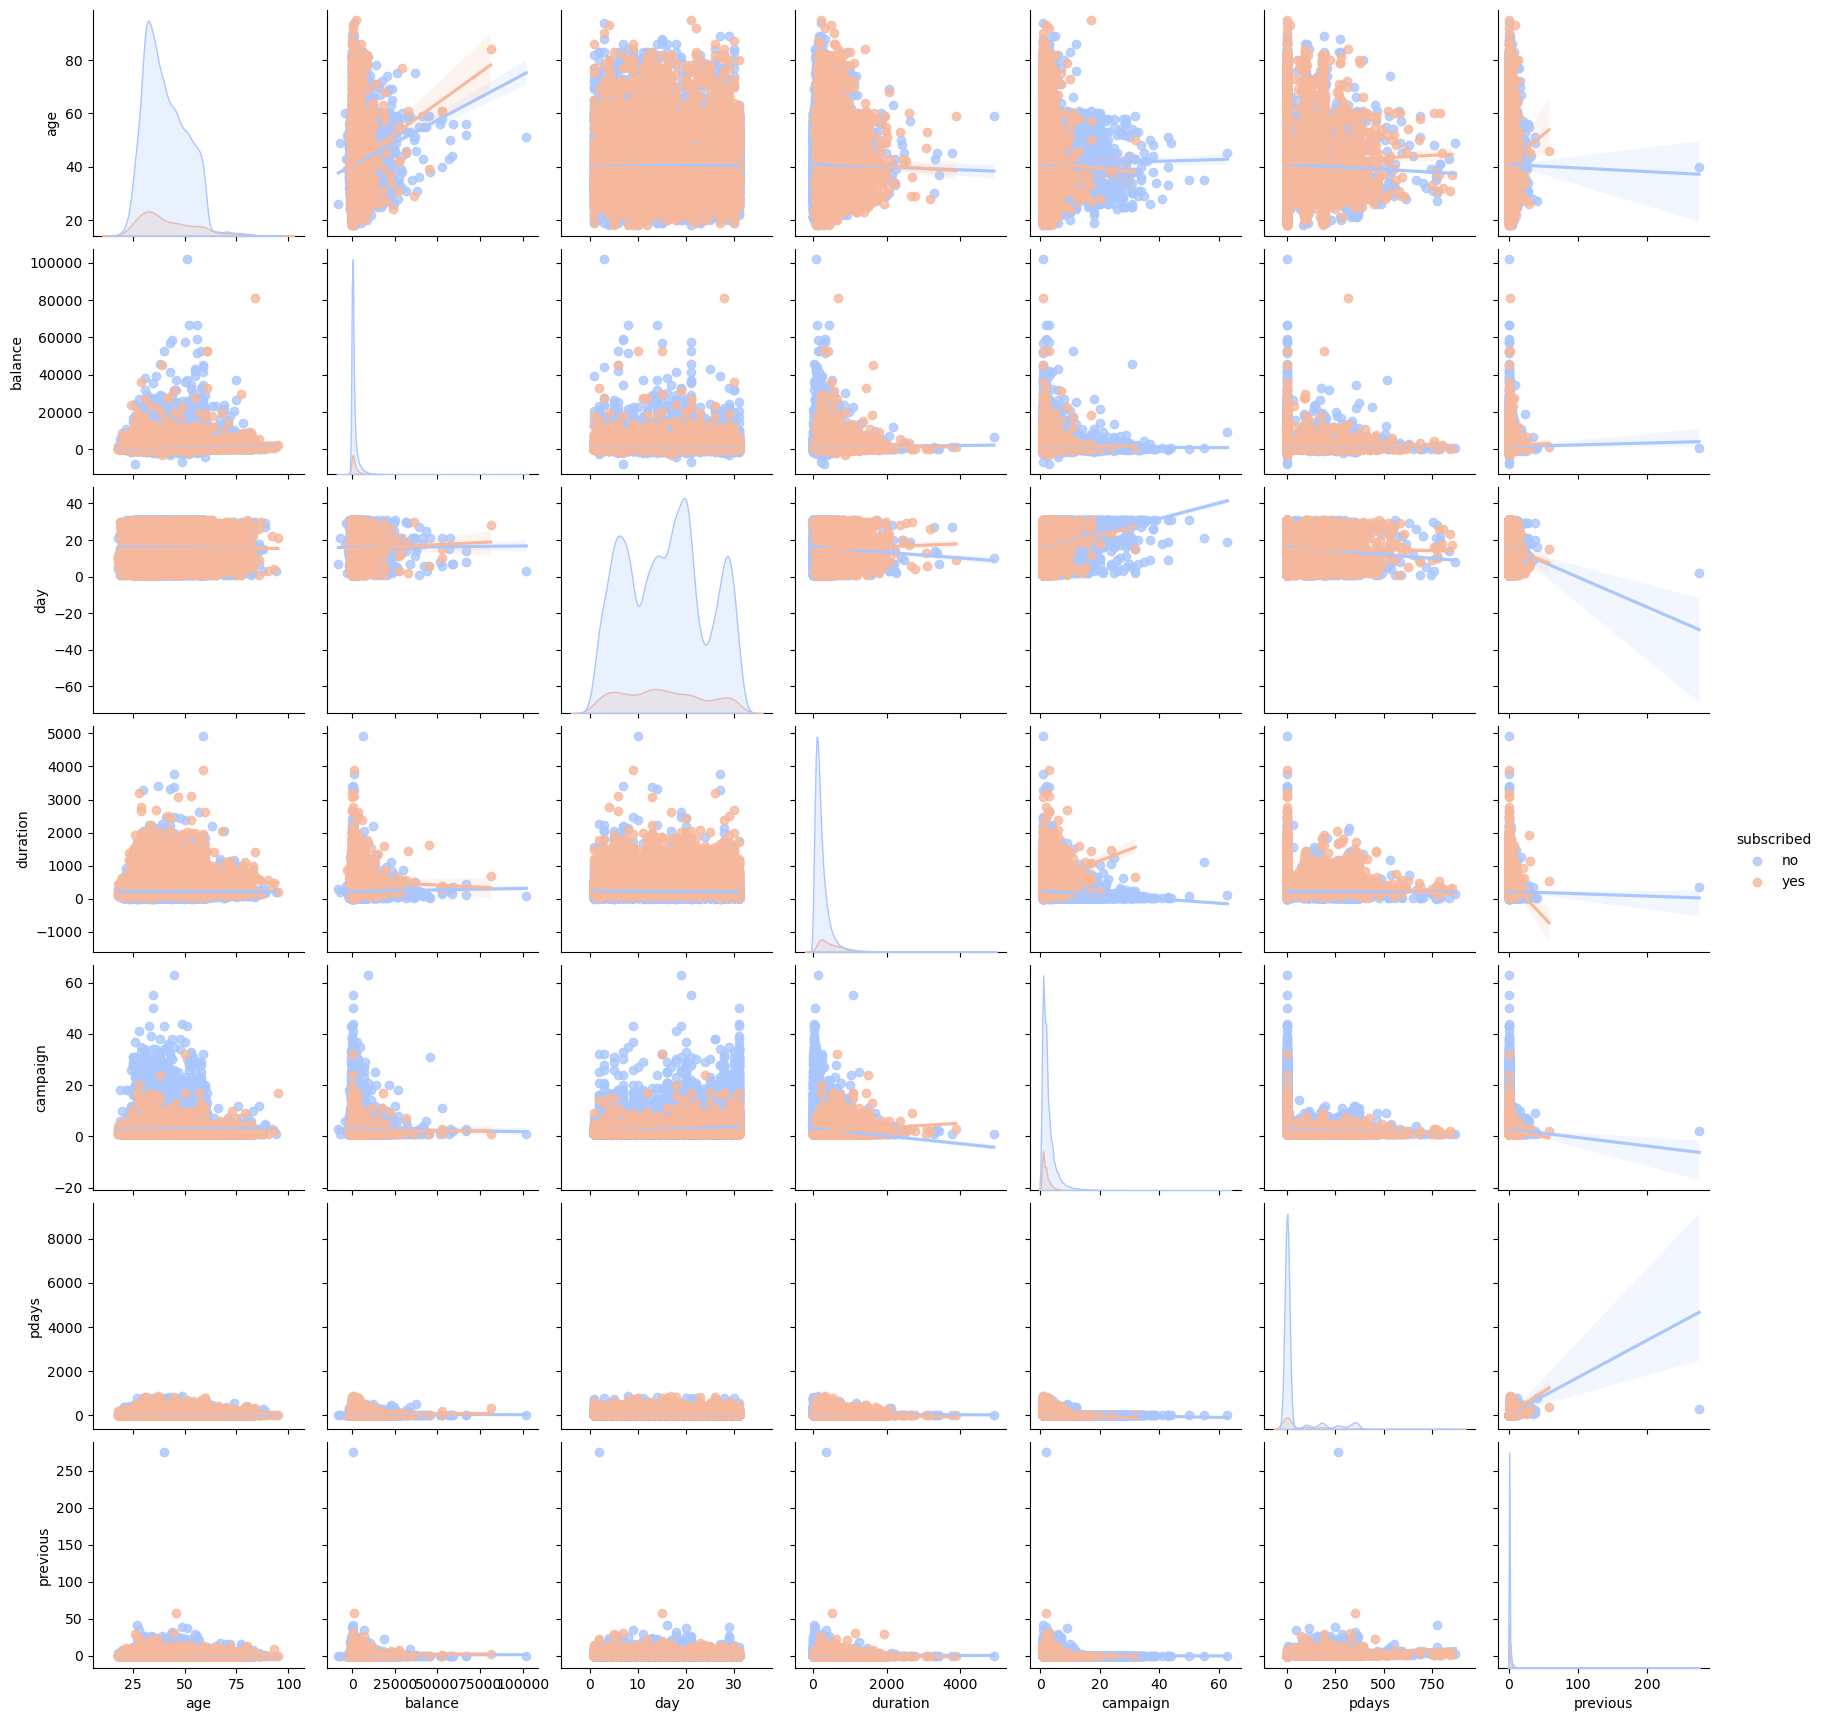

In [49]:
# Checking pair plot
sns.pairplot(df_train, kind='reg',hue='subscribed', palette='coolwarm')

Diagonal plot shows the kde plot of each column based on subscribed. Based on regression plot best fit line we can notice that
1. There is positive correlation in age vs balance column, pdays vs previous column.
2. There is negative correlation in day vs previous column.
In other column we can not observe any relation.

## Data Preprocessing

In [50]:
# Checking skewness
df_train.skew()

age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

Acceptable range of skewness is (-0.5 to +0.5). We can notice that There is skewness present in age, balance, duration, campaign, pdays, and previous column.

In [51]:
# Checking skewness in test data
df_test.skew()

age         0.692404
balance     9.165015
day         0.106806
duration    3.017221
campaign    4.958236
pdays       2.555601
previous    8.704583
dtype: float64

Similarly in test data there is skewness present in every numerical column except day column.

In [52]:
# To remove skewness we can perform cube root method

# For age column
df_train['age']=np.cbrt(df_train['age']) 
df_test['age']=np.cbrt(df_test['age'])

#for balance column
df_train['balance']=np.cbrt(df_train['balance']) 
df_test['balance']=np.cbrt(df_test['balance'])

# for duration column
df_train['duration']=np.cbrt(df_train['duration']) 
df_test['duration']=np.cbrt(df_test['duration'])

# For campaign column
df_train['campaign']=np.cbrt(df_train['campaign']) 
df_test['campaign']=np.cbrt(df_test['campaign'])

# for pdays column
df_train['pdays']=np.cbrt(df_train['pdays']) 
df_test['pdays']=np.cbrt(df_test['pdays'])

# For previous Column
df_train['previous']=np.cbrt(df_train['previous']) 
df_test['previous']=np.cbrt(df_test['previous'])

In [53]:
# Checking skewness in training data and test data
print(df_train.skew())
print(df_test.skew())

age         0.286363
balance    -0.086014
day         0.087185
duration    0.647275
campaign    1.667938
pdays       1.779036
previous    2.079738
dtype: float64
age         0.286833
balance    -0.059591
day         0.106806
duration    0.624285
campaign    1.618080
pdays       1.722786
previous    2.005334
dtype: float64


By cube root transformation Method skewness is almost removed in numerical columns in training data and test data.

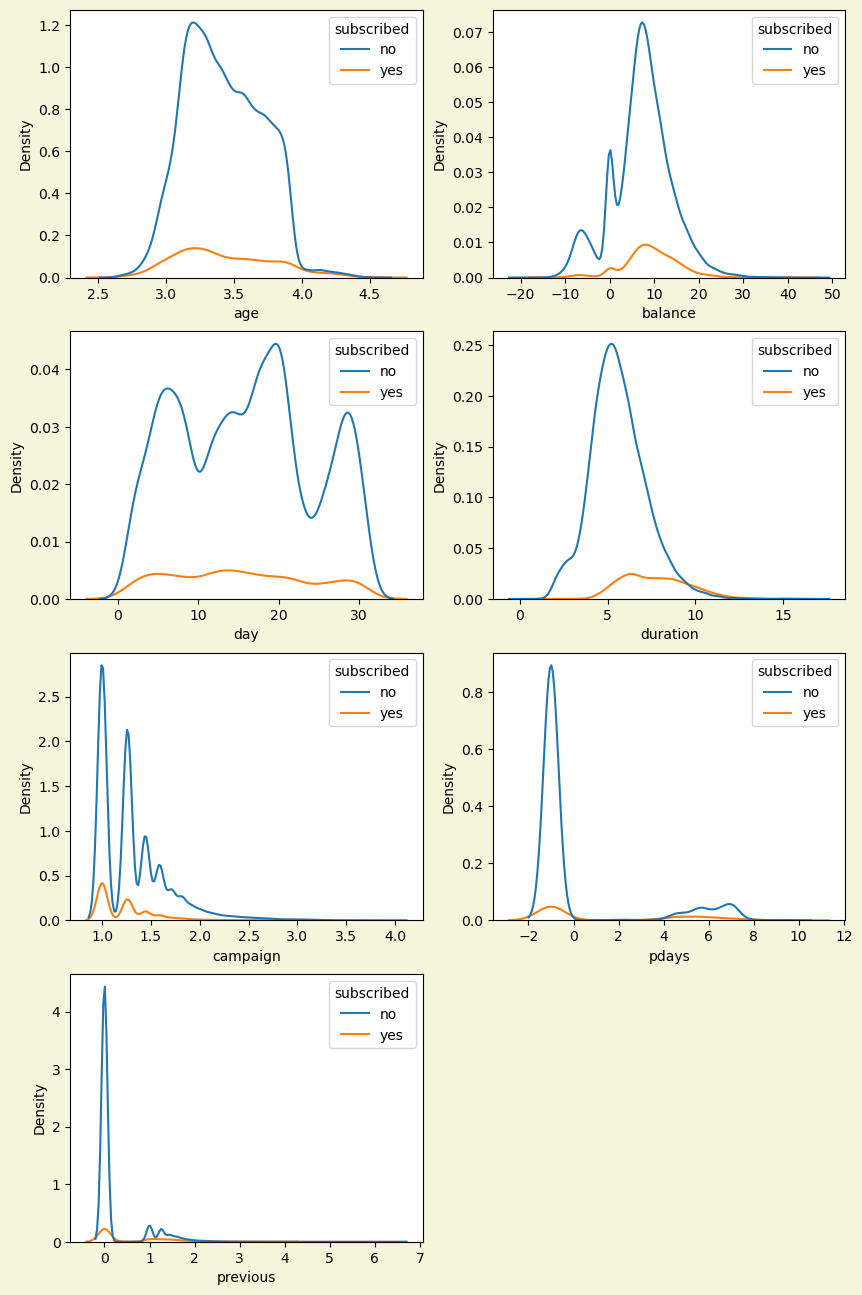

In [54]:
# visualize how well skewness is removed in training dataset
plotnum=1
plt.figure(figsize=(10,16), facecolor='beige')
for i in numerical_col:
    if plotnum<=10:
        plt.subplot(4,2,plotnum)
        sns.kdeplot(x=i, data=df_train, hue='subscribed')
    plotnum+=1
plt.show()

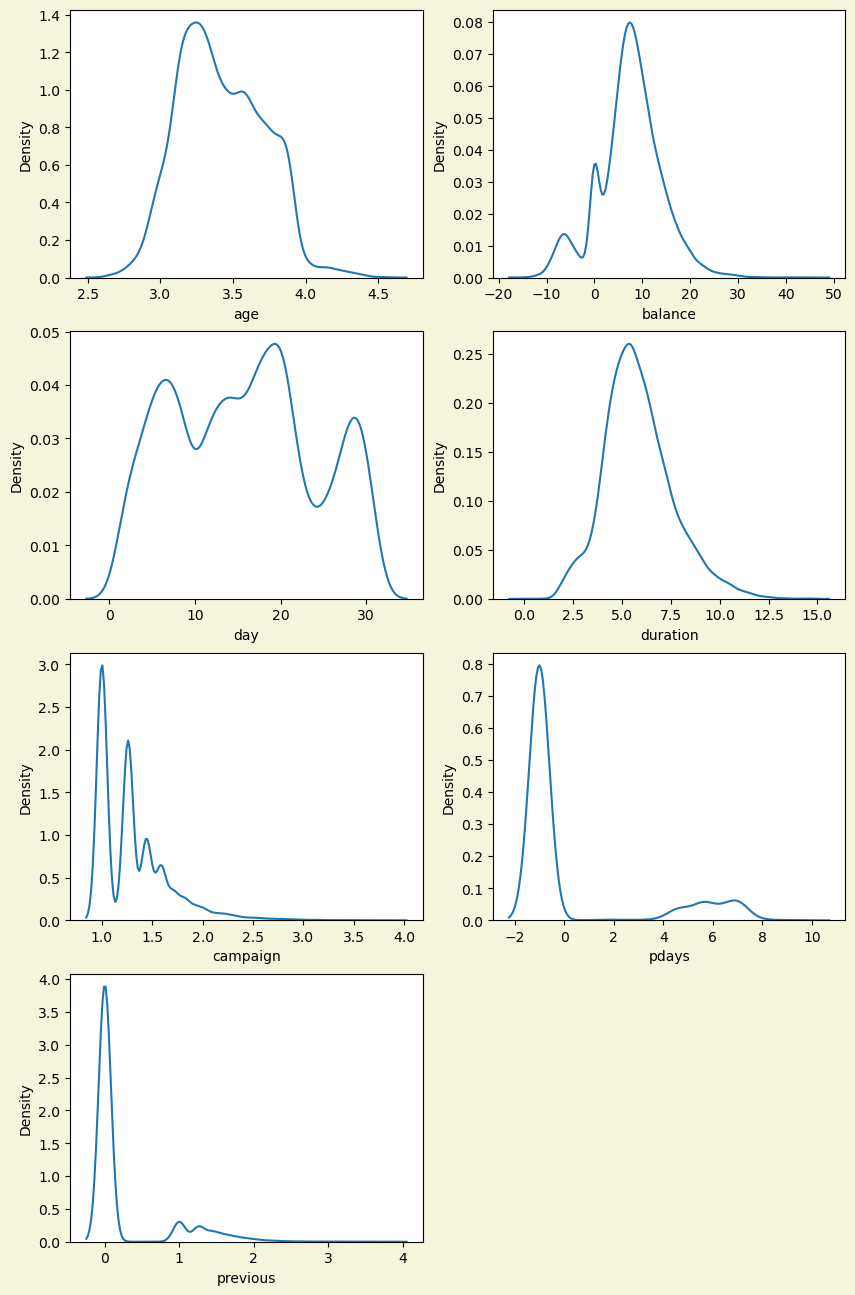

In [55]:
# visualize how well skewness is removed in test dataset
plotnum=1
plt.figure(figsize=(10,16), facecolor='beige')
for i in numerical_col:
    if plotnum<=10:
        plt.subplot(4,2,plotnum)
        sns.kdeplot(x=i, data=df_test)
    plotnum+=1
plt.show()

Although a very small amount of skewness is present in in dataset but most of the skewness is removed.

In [56]:
# Assigning values to encode the categorical data
type_of_job={'services':1, 'retired':2, 'self-employed':3,
             'blue-collar':4, 'management':5, 'technician':6, 
             'admin.':7, 'unemployed':8, 'housemaid':9,
             'entrepreneur':10, 'student':11, 'unknown':12}
marriage={'married':1, 'divorced':2, 'single':3}
edu={'secondary':1, 'primary':2,
     'tertiary':3, 'unknown':4}
yes_no={'no':0, 'yes':1}
comm={'cellular':1, 'telephone':2, 'unknown':3}
months={'may':5, 'jul':7, 'jun':6,
        'mar':3, 'feb':2, 'sep':9,
        'aug':8, 'dec':12, 'jan':1,
        'apr':4, 'nov':11, 'oct':10}
ocome={'unknown':1, 'failure':2,
       'other':3, 'success':4}
# creating empty dictionary
replace_dict_1={}     # to repace traing data
replace_dict_2={}     # to replace test data

#assigning each encoding value in the empty dictionary
replace_dict_1["job"]=type_of_job
replace_dict_1['marital']=marriage
replace_dict_1['education']=edu
replace_dict_1['default']=yes_no
replace_dict_1['housing']=yes_no
replace_dict_1['loan']=yes_no
replace_dict_1['contact']=comm
replace_dict_1['month']=months
replace_dict_1['poutcome']=ocome
replace_dict_1['subscribed']=yes_no

replace_dict_2["job"]=type_of_job
replace_dict_2['marital']=marriage
replace_dict_2['education']=edu
replace_dict_2['default']=yes_no
replace_dict_2['housing']=yes_no
replace_dict_2['loan']=yes_no
replace_dict_2['contact']=comm
replace_dict_2['month']=months
replace_dict_2['poutcome']=ocome

# replacing traing data
df_train_encoded=df_train.replace(replace_dict_1)
# replacing test data
df_test_encoded=df_test.replace(replace_dict_2)

In [57]:
df_train_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,7,1,4,0,12.456918,0,0,2,19,11,3.530348,1.259921,-1.000000,0.000000,1,0
1,3.141381,12,1,1,0,1.442250,0,0,1,20,7,4.497941,1.259921,-1.000000,0.000000,1,0
2,3.000000,1,1,1,0,9.622603,1,0,1,18,7,6.214465,1.000000,-1.000000,0.000000,1,0
3,3.848501,5,2,3,0,14.868480,0,0,1,22,6,9.535417,1.000000,4.379519,1.442250,4,1
4,3.141381,6,1,1,0,4.918685,1,0,1,4,2,7.243156,1.000000,-1.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,3.072317,5,3,3,0,0.000000,1,0,1,12,5,4.876999,1.259921,-1.000000,0.000000,1,0
31643,3.756286,5,2,3,0,7.243156,0,1,1,5,6,7.594363,1.259921,-1.000000,0.000000,1,1
31644,3.174802,5,3,3,0,6.782423,0,0,1,7,8,3.332222,1.442250,-1.000000,0.000000,1,0
31645,3.848501,6,1,1,0,6.082202,1,0,2,15,5,2.802039,1.912931,6.958943,2.289428,2,0


In [58]:
df_test_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,3.174802,1,1,1,0,4.904868,1,0,1,15,5,2.714418,1.817121,-1.000000,0.00000,1
1,4.272659,2,2,2,0,14.072751,0,0,2,1,7,7.191966,1.000000,-1.000000,0.00000,1
2,3.141381,3,3,3,0,5.241483,1,0,3,16,5,8.776383,1.000000,-1.000000,0.00000,1
3,3.848501,1,3,2,0,15.573360,1,0,2,13,5,4.020726,1.259921,-1.000000,0.00000,1
4,3.556893,4,2,1,0,-8.900130,0,1,3,3,7,4.805896,1.000000,-1.000000,0.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,3.391211,5,1,3,0,3.556893,0,0,1,28,8,5.289572,1.587401,-1.000000,0.00000,1
13560,3.779763,4,1,2,0,13.163613,1,0,3,20,6,5.406120,1.000000,-1.000000,0.00000,1
13561,3.271066,2,1,2,0,6.580844,1,0,1,29,1,5.142563,1.000000,-1.000000,0.00000,1
13562,3.072317,7,3,1,0,7.741753,0,0,1,9,11,5.924992,1.259921,4.497941,1.44225,4


In [59]:
# looking for basic information of traing data
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         31647 non-null  float64
 1   job         31647 non-null  int64  
 2   marital     31647 non-null  int64  
 3   education   31647 non-null  int64  
 4   default     31647 non-null  int64  
 5   balance     31647 non-null  float64
 6   housing     31647 non-null  int64  
 7   loan        31647 non-null  int64  
 8   contact     31647 non-null  int64  
 9   day         31647 non-null  int64  
 10  month       31647 non-null  int64  
 11  duration    31647 non-null  float64
 12  campaign    31647 non-null  float64
 13  pdays       31647 non-null  float64
 14  previous    31647 non-null  float64
 15  poutcome    31647 non-null  int64  
 16  subscribed  31647 non-null  int64  
dtypes: float64(6), int64(11)
memory usage: 4.1 MB


In [60]:
# checking basic information in testing data
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        13564 non-null  float64
 1   job        13564 non-null  int64  
 2   marital    13564 non-null  int64  
 3   education  13564 non-null  int64  
 4   default    13564 non-null  int64  
 5   balance    13564 non-null  float64
 6   housing    13564 non-null  int64  
 7   loan       13564 non-null  int64  
 8   contact    13564 non-null  int64  
 9   day        13564 non-null  int64  
 10  month      13564 non-null  int64  
 11  duration   13564 non-null  float64
 12  campaign   13564 non-null  float64
 13  pdays      13564 non-null  float64
 14  previous   13564 non-null  float64
 15  poutcome   13564 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 1.7 MB


From traing and testing dataset we can observe that all the categorical data has been transformed into ordinal data / integer data.

In [61]:
# Checking correlation
df_train_encoded.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.127609,-0.394090,0.043271,-0.014852,0.097645,-0.168935,-0.008282,0.031325,-0.008998,0.101406,-0.014250,0.023006,-0.011360,-0.000488,0.002068,0.009310
job,-0.127609,1.000000,0.104556,0.095068,0.005795,0.022301,-0.085278,-0.028043,-0.054847,0.001371,0.019855,-0.023194,-0.000267,0.000658,0.008007,0.012736,0.025314
marital,-0.394090,0.104556,1.000000,0.045922,0.008237,-0.003349,-0.020393,-0.046597,-0.043980,-0.007568,-0.071464,0.024669,-0.050824,0.035688,0.033948,0.042845,0.069516
education,0.043271,0.095068,0.045922,1.000000,-0.013114,0.098265,-0.118649,-0.076061,-0.067476,0.006749,0.058206,-0.004421,0.013792,-0.001406,0.010371,0.026068,0.057703
default,-0.014852,0.005795,0.008237,-0.013114,1.000000,-0.198400,-0.011823,0.081567,0.014053,0.009996,0.014244,-0.009781,0.018914,-0.036851,-0.036702,-0.037558,-0.020168
balance,0.097645,0.022301,-0.003349,0.098265,-0.198400,1.000000,-0.087058,-0.142789,-0.047563,-0.011106,0.081858,0.038476,-0.035939,0.060453,0.070936,0.081859,0.097107
housing,-0.168935,-0.085278,-0.020393,-0.118649,-0.011823,-0.087058,1.000000,0.036244,0.195103,-0.025666,-0.173980,0.001012,-0.033177,0.081725,0.053207,-0.007233,-0.141092
loan,-0.008282,-0.028043,-0.046597,-0.076061,0.081567,-0.142789,0.036244,1.000000,-0.009213,0.014769,0.022717,-0.011323,0.006838,-0.025042,-0.025072,-0.045987,-0.072266
contact,0.031325,-0.054847,-0.043980,-0.067476,0.014053,-0.047563,0.195103,-0.009213,1.000000,-0.027046,-0.175751,-0.032611,0.014552,-0.281906,-0.273055,-0.251024,-0.150051
day,-0.008998,0.001371,-0.007568,0.006749,0.009996,-0.011106,-0.025666,0.014769,-0.027046,1.000000,0.099356,-0.052736,0.164516,-0.084394,-0.078785,-0.066634,-0.029600


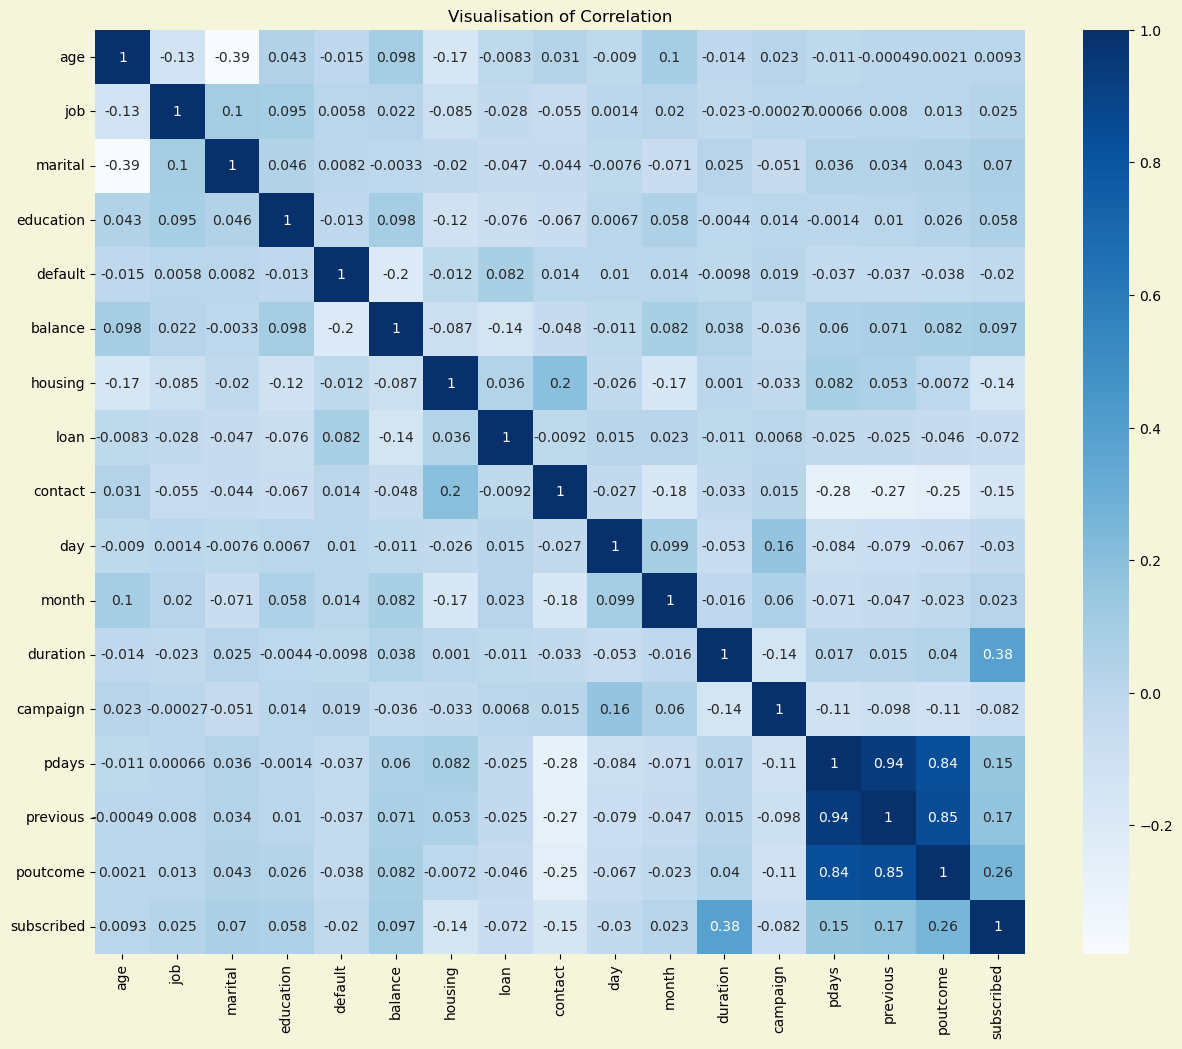

In [62]:
# visualise correlation through heatmap
plt.figure(figsize=(15,12), facecolor='beige')
plt.title("Visualisation of Correlation")
sns.heatmap(df_train_encoded.corr(), annot=True, cmap="Blues")
plt.show()

With subscribe most of the column is very negligible correlated. There is strong positive correlation found in previous vs pdays, poutcome vs pdays, and poutcomes vs previous.

## Feature Engineering

In [63]:
# Seperating features and label 
x=df_train_encoded.drop("subscribed", axis=1)
y=df_train_encoded['subscribed']

In [64]:
# feature scaling with Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
df_test_scalled=pd.DataFrame(scaler.fit_transform(df_test_encoded), columns=df_test_encoded.columns)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.383398,0.809263,-0.767338,2.186351,-0.137234,0.757778,-1.118201,-0.439893,0.395076,0.379579,2.016957,-1.328474,-0.127816,-0.461627,-0.449105,-0.412969
1,-0.961854,2.956232,-0.767338,-0.884775,-0.137234,-0.911548,-1.118201,-0.439893,-0.716695,0.499526,0.354571,-0.775734,-0.127816,-0.461627,-0.449105,-0.412969
2,-1.446270,-1.767099,-0.767338,-0.884775,-0.137234,0.328224,0.894294,-0.439893,-0.716695,0.259631,0.354571,0.204835,-0.873593,-0.461627,-0.449105,-0.412969
3,1.460966,-0.049524,0.363515,1.162642,-0.137234,1.123262,-1.118201,-0.439893,-0.716695,0.739422,-0.061026,2.101938,-0.873593,1.542654,2.189741,3.875777
4,-0.961854,0.379870,-0.767338,-0.884775,-0.137234,-0.384677,0.894294,-0.439893,-0.716695,-1.419637,-1.723412,0.792477,-0.873593,-0.461627,-0.449105,-0.412969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.198489,-0.049524,1.494368,1.162642,-0.137234,-1.130128,0.894294,-0.439893,-0.716695,-0.460055,-0.476622,-0.559197,-0.127816,-0.461627,-0.449105,-0.412969
31643,1.145007,-0.049524,0.363515,1.162642,-0.137234,-0.032392,-1.118201,2.273280,-0.716695,-1.299690,-0.061026,0.993105,-0.127816,-0.461627,-0.449105,-0.412969
31644,-0.847342,-0.049524,1.494368,1.162642,-0.137234,-0.102219,-1.118201,-0.439893,-0.716695,-1.059794,0.770168,-1.441655,0.395329,-0.461627,-0.449105,-0.412969
31645,1.460966,0.379870,-0.767338,-0.884775,-0.137234,-0.208341,0.894294,-0.439893,0.395076,-0.100212,-0.476622,-1.744523,1.745828,2.503686,3.739801,1.016613


In [65]:
# Checking scalled dataset of test data
df_test_scalled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.841679,-1.756584,-0.774684,-0.882858,-0.131336,-0.388757,0.893033,-0.429564,-0.704444,-0.089124,-0.472404,-1.770139,1.476242,-0.471159,-0.458201,-0.420731
1,2.924132,-1.332591,0.353611,0.143109,-0.131336,1.009579,-1.119779,-0.429564,0.413763,-1.778340,0.356694,0.760054,-0.876872,-0.471159,-0.458201,-0.420731
2,-0.956319,-0.908597,1.481907,1.169076,-0.131336,-0.337414,0.893033,-0.429564,1.531969,0.031534,-0.472404,1.655383,-0.876872,-0.471159,-0.458201,-0.420731
3,1.469209,-1.756584,1.481907,0.143109,-0.131336,1.238460,0.893033,-0.429564,0.413763,-0.330440,-0.472404,-1.031965,-0.128360,-0.471159,-0.458201,-0.420731
4,0.468951,-0.484604,0.353611,-0.882858,-0.131336,-2.494370,-1.119779,2.327941,1.531969,-1.537023,0.356694,-0.588278,-0.876872,-0.471159,-0.458201,-0.420731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.099363,-0.060611,-0.774684,1.169076,-0.131336,-0.594357,-1.119779,-0.429564,-0.704444,1.479434,0.771244,-0.314959,0.814705,-0.471159,-0.458201,-0.420731
13560,1.233427,-0.484604,-0.774684,0.143109,-0.131336,0.870912,0.893033,-0.429564,1.531969,0.514168,-0.057855,-0.249100,-0.876872,-0.471159,-0.458201,-0.420731
13561,-0.511478,-1.332591,-0.774684,0.143109,-0.131336,-0.133128,0.893033,-0.429564,-0.704444,1.600092,-2.130601,-0.398032,-0.876872,-0.471159,-0.458201,-0.420731
13562,-1.193218,0.787376,1.481907,-0.882858,-0.131336,0.043941,-1.119779,-0.429564,-0.704444,-0.813073,2.014891,0.044106,-0.128360,1.540335,2.140126,3.889534


In [66]:
#checking the variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF Values']=[variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
vif

,Features,VIF Values
0,age,1.269056
1,job,1.041859
2,marital,1.212409
3,education,1.040824
4,default,1.046658
5,balance,1.095155
6,housing,1.162019
7,loan,1.034641
8,contact,1.196773
9,day,1.043301


Vif value of all the columns in scalled dataset is in the permissible range. Hence we do not need to drop any column.

In [67]:
# checking value counts in target variavles
y.value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

We can observe that the count of no subscribed clients is greater than the yes subscribed clients. Hence it is the imbalance case problem. We can overcome this problem with SMOTE method.

In [68]:
# solving the case imbalance problem 
import imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)
y1.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

## Modeling

In [69]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve

In [70]:
# Finding the best random_state
maxAccu=0
maxRS=0
for i in range(50):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(f"Best Accuracy is {maxAccu} at random state {maxRS}")

Best Accuracy is 0.9498210023866348 at random state 41


In [71]:
# Spliting the data into traing data and testing data
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)
print(f"The shape of traing data is {x_train.shape}. and \nThe shape of the test data is {x_test.shape}.")

The shape of traing data is (39104, 16). and 
The shape of the test data is (16760, 16).


In [72]:
# Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score in RFC :', accuracy_score(y_test,predrfc),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,predrfc),"\n")
print("Classification Report:\n", classification_report(y_test,predrfc))

Accuracy Score in RFC : 0.948090692124105 

Confusion Matrix: 
 [[7756  631]
 [ 239 8134]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      8387
           1       0.93      0.97      0.95      8373

    accuracy                           0.95     16760
   macro avg       0.95      0.95      0.95     16760
weighted avg       0.95      0.95      0.95     16760



In [ ]:
#Hyper Parameter Tuning
parameters={"criterion":['gini', 'entropy'],
            'max_depth': [10, 20, 30],
            'n_estimators': [100, 200, 400]}
GCV=GridSearchCV(RandomForestClassifier(),parameters, cv=5)
# Feeding the data to learn
GCV.fit(x_train,y_train)
# Finding best paramentes
GCV.best_params_

In [73]:
# Extra Trees Classifier
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
predet=et.predict(x_test)
print('Accuracy Score in ET :', accuracy_score(y_test,predet),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,predet),"\n")
print("Classification Report:\n", classification_report(y_test,predet))

Accuracy Score in ET : 0.9591885441527447 

Confusion Matrix: 
 [[7821  566]
 [ 118 8255]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      8387
           1       0.94      0.99      0.96      8373

    accuracy                           0.96     16760
   macro avg       0.96      0.96      0.96     16760
weighted avg       0.96      0.96      0.96     16760



In [ ]:
#Hyper Parameter Tuning
parameters={"criterion":['gini', 'entropy','log_loss'],
            'max_depth': [10, 20, 30],
            'max_features': ['log2', 'sqrt'],
            'n_estimators': [100, 200, 400]}
GCV=GridSearchCV(RandomForestClassifier(),parameters, cv=5)
# Feeding the data to learn
GCV.fit(x_train,y_train)
# Finding best paramentes
GCV.best_params_

In [74]:
# Ada Boost Classifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy Score in AdaBoost :', accuracy_score(y_test,predad),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,predad),'\n')
print("Classification Report:\n", classification_report(y_test,predad))

Accuracy Score in AdaBoost : 0.8903937947494034 

Confusion Matrix: 
 [[7485  902]
 [ 935 7438]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      8387
           1       0.89      0.89      0.89      8373

    accuracy                           0.89     16760
   macro avg       0.89      0.89      0.89     16760
weighted avg       0.89      0.89      0.89     16760



In [75]:
# Bagging Classifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print('Accuracy Score in Bagging :', accuracy_score(y_test,predbc),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,predbc),"\n")
print("Classification Report:\n", classification_report(y_test,predbc))

Accuracy Score in Bagging : 0.9355011933174224 

Confusion Matrix: 
 [[7744  643]
 [ 438 7935]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      8387
           1       0.93      0.95      0.94      8373

    accuracy                           0.94     16760
   macro avg       0.94      0.94      0.94     16760
weighted avg       0.94      0.94      0.94     16760



In [76]:
# Lofistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy Score in LR :', accuracy_score(y_test,predlr),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,predlr),"\n")
print("Classification Report: \n", classification_report(y_test,predlr))

Accuracy Score in LR : 0.8218973747016707 

Confusion Matrix: 
 [[6858 1529]
 [1456 6917]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      8387
           1       0.82      0.83      0.82      8373

    accuracy                           0.82     16760
   macro avg       0.82      0.82      0.82     16760
weighted avg       0.82      0.82      0.82     16760



In [77]:
# Gaussian Naive Bayes
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print('Accuracy Score in GNB :', accuracy_score(y_test,predgnb),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,predgnb),"\n")
print("Classification Report:\n", classification_report(y_test,predgnb))

Accuracy Score in GNB : 0.750417661097852 

Confusion Matrix: 
 [[6540 1847]
 [2336 6037]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76      8387
           1       0.77      0.72      0.74      8373

    accuracy                           0.75     16760
   macro avg       0.75      0.75      0.75     16760
weighted avg       0.75      0.75      0.75     16760



In [78]:
# stochastic gradient descent classifier
sgdc=SGDClassifier()
sgdc.fit(x_train,y_train)
predsgdc=rfc.predict(x_test)
print('Accuracy Score in SGDC :', accuracy_score(y_test,predsgdc),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,predsgdc),'\n')
print("Classification Report:\n", classification_report(y_test,predsgdc))

Accuracy Score in SGDC : 0.948090692124105 

Confusion Matrix: 
 [[7756  631]
 [ 239 8134]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      8387
           1       0.93      0.97      0.95      8373

    accuracy                           0.95     16760
   macro avg       0.95      0.95      0.95     16760
weighted avg       0.95      0.95      0.95     16760



In [79]:
# K nearest neighbors classifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc=knc.predict(x_test)
print('Accuracy Score in KNC :', accuracy_score(y_test,predknc),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,predknc),'\n')
print("Classification Report:\n", classification_report(y_test,predknc))

Accuracy Score in KNC : 0.910799522673031 

Confusion Matrix: 
 [[6954 1433]
 [  62 8311]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90      8387
           1       0.85      0.99      0.92      8373

    accuracy                           0.91     16760
   macro avg       0.92      0.91      0.91     16760
weighted avg       0.92      0.91      0.91     16760



In [80]:
# Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy Score in DTC :', accuracy_score(y_test,preddtc),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,preddtc),'\n')
print("Classification Report\n", classification_report(y_test,preddtc))

Accuracy Score in DTC : 0.908890214797136 

Confusion Matrix: 
 [[7559  828]
 [ 699 7674]] 

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      8387
           1       0.90      0.92      0.91      8373

    accuracy                           0.91     16760
   macro avg       0.91      0.91      0.91     16760
weighted avg       0.91      0.91      0.91     16760



In [81]:
# Gradient Boosting Classifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print('Accuracy Score in GB :', accuracy_score(y_test,predgb),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,predgb),'\n')
print("Classification Report:\n", classification_report(y_test,predgb))

Accuracy Score in GB : 0.9170644391408115 

Confusion Matrix: 
 [[7495  892]
 [ 498 7875]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92      8387
           1       0.90      0.94      0.92      8373

    accuracy                           0.92     16760
   macro avg       0.92      0.92      0.92     16760
weighted avg       0.92      0.92      0.92     16760



From all of the model we can notice that Extra tree classifier give us the best accuracy score. Lets hypertuned that model for the final model

### Hyper Parameter Tuning

In [88]:
#Hyper Parameter Tuning
parameters={"criterion":['gini', 'entropy','log_loss'],
            'max_depth': [10, 20, 30],
            'max_features': ['log2', 'sqrt'],
            'n_estimators': [100, 200, 400],
            'n_jobs': [-2, -1],
            'random_state': [10, 40, 50]}
GCV=GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [89]:
# Feeding the data to learn
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [100, 200, 400], 'n_jobs': [-2, -1],
                         'random_state': [10, 40, 50]})

In [90]:
# Finding best paramentes
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'n_estimators': 400,
 'n_jobs': -2,
 'random_state': 10}

In [91]:
#Finding the best model
final_model=ExtraTreesClassifier(criterion='gini',
                                 max_depth=30,
                                 max_features='log2',
                                 n_estimators=400,
                                 n_jobs=-2,
                                 random_state=10)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

95.97852028639619


We can observe that the final model gives us the best result as previous model was giving us 95.91% and this model gives us 95.97%. Hence model accuracy has been enhanced.

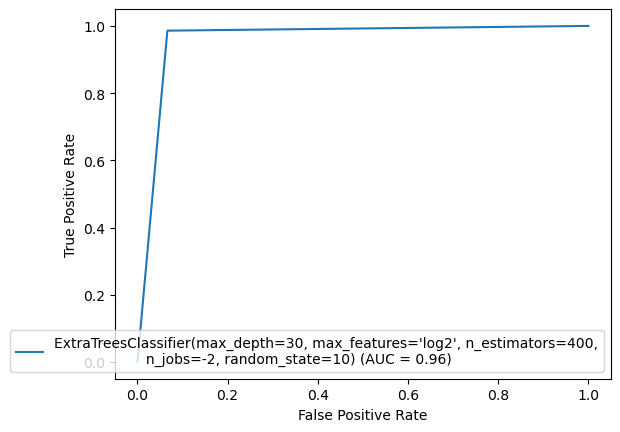

In [93]:
# Checking AUC ROC curve
from sklearn import metrics
fpr,tpr,thresolds=metrics.roc_curve(y_test, pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name= final_model)
display.plot()

### Saving the final model

In [94]:
# importing libraries
import joblib
# Saving the model using dump method
joblib.dump(final_model,"term_deposite_subscription.pkl")

['term_deposite_subscription.pkl']

In [95]:
# Lets load the  saved model and get the predictions
model=joblib.load("term_deposite_subscription.pkl")

### Prediction

In [96]:
# predicting the data that has been given in the project (Test data)
prediction=model.predict(df_test_encoded)
df=pd.DataFrame()
df["Predicted value"]=prediction
df

,Predicted value
0,1
1,1
2,0
3,1
4,1
...,...
13559,1
13560,1
13561,1
13562,1


Hare we got the predicted value for the test data that has been given in the question paper.

# Thank You